# Imports

## Libraries

In [1]:
### Basic Libraries
from datetime import datetime
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd

### Visualization
# !pip install matplotlib
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
# !pip install plotly
import plotly.express as px
# !pip install squarify
import squarify
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
# !pip install nbformat>=4.2.0

### Sklearn
# !pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Functions
from utils1 import (
    plot_pie_chart, 
    plot_bar_chart, 
    plot_line_chart, 
    plot_histogram, 
    plot_correlation_matrix, 
    plot_scatter, 
    knn_imputer_best_k
)

### Warnings
import warnings
warnings.filterwarnings('ignore')

# Set the path to the data files
path = 'G:\\O meu disco\\Universidade\\2nd year\\2nd semester\\Machine Learning II\\Project\\'

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_15888\4210368423.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data

In [2]:
# Read the customer information dataset from a CSV file
customer_info = pd.read_csv(path + 'Customer Info Dataset.csv', index_col = 'customer_id')

In [3]:
# Sort the customer_info DataFrame by index in-place
customer_info.sort_index(inplace = True)

# Display the sorted customer_info DataFrame
customer_info

customer_name customer_gender   customer_birthdate  \
customer_id                                                                   
1               Bsc. Patricia Behrmann          female  06/19/1981 01:04 AM   
2              Msc. Virginia Hernandez          female  03/16/1985 08:17 AM   
3                     Msc. Vivian Mink          female  07/07/1944 03:56 AM   
4            Phd. Christine Herrington          female  08/11/1955 02:43 PM   
5                Phd. Brandon Robinson            male  07/01/1971 04:14 PM   
...                                ...             ...                  ...   
29996                   Hailey Squires          female  07/16/1993 05:06 PM   
29997                    Paul Paramore            male  01/20/1943 12:51 AM   
29998                         Dee Roos            male  02/19/1978 08:50 PM   
29999               Wendell Stinebaugh            male  12/06/1982 11:39 PM   
30000                    Johnnie Smith          female  09/01/1956 11:37 PM   

             kids_home  teens_home  number_complaints  \
customer_id                                             
1                  1.0         0.0                0.0   
2                  2.0         0.0                0.0   
3                  1.0         0.0                1.0   
4                  0.0         1.0                0.0   
5                  7.0         2.0                1.0   
...                ...         ...                ...   
29996              0.0         0.0                0.0   
29997              1.0         0.0                1.0   
29998              1.0         1.0                0.0   
29999              0.0         1.0                1.0   
30000              2.0         1.0                1.0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
1                                2.0                     198.0   
2                                2.0                     920.0   
3                                3.0                    1068.0   
4                                2.0                     161.0   
5                                3.0                    4809.0   
...                              ...                       ...   
29996                            3.0                    7787.0   
29997                           20.0                     467.0   
29998                            1.0                    1039.0   
29999                            3.0                     770.0   
30000                            3.0                    5158.0   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
1                                5077.0          21.0  ...   
2                                  56.0          10.0  ...   
3                                  51.0           8.0  ...   
4                                1057.0          17.0  ...   
5                                 233.0          19.0  ...   
...                                 ...           ...  ...   
29996                             978.0          20.0  ...   
29997                              20.0           9.0  ...   
29998                              45.0          11.0  ...   
29999                              50.0          10.0  ...   
30000                             177.0          21.0  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
1                           13.0                177.0                    34.0   
2                            0.0                  0.0                   107.0   
3                            0.0                  0.0                   102.0   
4                          150.0                 56.0                    47.0   
5                          887.0               1279.0                   409.0   
...                   

# Refactoring

In [4]:
# Retrieve the column names of the customer_info DataFrame
customer_info.columns

Index(['customer_name', 'customer_gender', 'customer_birthdate', 'kids_home',
       'teens_home', 'number_complaints', 'distinct_stores_visited',
       'lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card_number', 'latitude', 'longitude'],
      dtype='object')

In [5]:
# Create a dictionary to store refactored column names
refactored_columns = {col: col.replace('lifetime_', '') if col.startswith('lifetime_') else col for col in customer_info.columns}

# Rename the columns of the customer_info DataFrame using the refactored column names
customer_info.rename(columns=refactored_columns, inplace=True)

10 variables starts with 'lifetime', which leads us to believe that the variable refers to the customer's total value since the first purchase. However, the data refers only to the last 2 years and to improve its veracity this connotation has been removed.

# Missing Values and Data Types

In [6]:
# Display information about the customer_info DataFrame
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_name                            30000 non-null  object 
 1   customer_gender                          30000 non-null  object 
 2   customer_birthdate                       30000 non-null  object 
 3   kids_home                                30000 non-null  float64
 4   teens_home                               30000 non-null  float64
 5   number_complaints                        30000 non-null  float64
 6   distinct_stores_visited                  30000 non-null  float64
 7   spend_groceries                          30000 non-null  float64
 8   spend_electronics                        30000 non-null  float64
 9   typical_hour                             30000 non-null  float64
 10  spend_vegetables                         30000 non-

- Only `loyalty_card_number` has missing values (30000 - 5825 = 24175)
- `customer_name`, `customer_gender` and `customer_birthdate` are the only object variable, since the last two mentioned can (and should) be transformed

# Distributions

In [7]:
# Generate descriptive statistics for the customer_info DataFrame
customer_info.describe().T

count          mean           std  \
kids_home                                30000.0  1.146700e+00      1.234111   
teens_home                               30000.0  5.129333e-01      0.912502   
number_complaints                        30000.0  7.643667e-01      0.836341   
distinct_stores_visited                  30000.0  6.120767e+00      6.511410   
spend_groceries                          30000.0  3.978634e+03   5280.641466   
spend_electronics                        30000.0  9.652388e+02   1755.323397   
typical_hour                             30000.0          -inf           NaN   
spend_vegetables                         30000.0  5.642078e+02    481.819086   
spend_nonalcohol_drinks                  30000.0  6.287501e+02    496.346400   
spend_alcohol_drinks                     30000.0  3.793445e+02    236.206400   
spend_meat                               30000.0  5.138784e+02    575.448347   
spend_fish                               30000.0  7.771518e+02   3036.405862   
spend_hygiene                            30000.0  1.628245e+02    168.547217   
spend_videogames                         30000.0          -inf           NaN   
total_distinct_products                  30000.0  1.123887e+03   1423.956421   
percentage_of_products_bought_promotion  30000.0  1.909811e-01      0.145402   
year_first_transaction                   30000.0  2.008684e+03      4.992296   
loyalty_card_number                       5825.0  9.499115e+05  28920.116430   
latitude                                 30000.0  3.874822e+01      0.024788   
longitude                                30000.0 -9.157740e+00      0.025749   

                                                  min            25%  \
kids_home                                0.000000e+00       0.000000   
teens_home                               0.000000e+00       0.000000   
number_complaints                        0.000000e+00       0.000000   
distinct_stores_visited                  0.000000e+00       2.000000   
spend_groceries                          0.000000e+00     220.000000   
spend_electronics                        1.058527e+00      45.000000   
typical_hour                                     -inf       9.000000   
spend_vegetables                         1.000000e+00     247.000000   
spend_nonalcohol_drinks                  0.000000e+00     244.000000   
spend_alcohol_drinks                     0.000000e+00     193.000000   
spend_meat                               0.000000e+00      46.000000   
spend_fish                               0.000000e+00      48.000000   
spend_hygiene                            0.000000e+00      50.000000   
spend_videogames                                 -inf      46.000000   
total_distinct_products                  0.000000e+00     116.000000   
percentage_of_products_bought_promotion  2.192022e-02       0.099313   
year_first_transaction                   1.989000e+03    2006.000000   
loyalty_card_number                      9.000390e+05  924547.000000   
latitude                                 3.865335e+01      38.731150   
longitude                               -9.215240e+00      -9.177770   

                                                   50%            75%  \
kids_home                                     1.000000       1.000000   
teens_home                                    0.000000       1.000000   
number_complaints                             1.000000       1.000000   
distinct_stores_visited                       3.000000       8.000000   
spend_groceries                             950.000000    5253.000000   
spend_electronics                           194.000000     721.000000   
typical_hour                                 14.000000      20.000000   
spend_vegetables                            425.000000     785.000000   
spend_nonalcohol_drinks                     425.000000     949.000000   
spend_alcohol_drinks                        419.000000     537.000000   
spend_meat                                  16

# Feature Engineering

In [8]:
# Extract columns that start with 'spend'
spends = customer_info.columns[customer_info.columns.str.startswith('spend')]

# Calculate the total spend by summing the 'spend' columns across rows
total_spend = customer_info.loc[:, spends].sum(axis = 1)

# Calculate the percentage spend for each 'spend' column
for column in customer_info.columns:
    if column.startswith('spend'):
        # Create a new column name for the percentage spend
        percentage_column = 'percentage_spend_' + column.split('_', 1)[-1]
        
        # Calculate the percentage spend by dividing the 'spend' column by the total spend
        customer_info[percentage_column] = customer_info[column] / total_spend


`percentage_spend` variables created were created to gain a new dimension (notion) and thus understand the weight that each category has in the consumption of each consumer.

# Feature Transformation

In [9]:
# Convert customer gender to binary indicator variable
customer_info['customer_gender'] = pd.get_dummies(customer_info['customer_gender']).iloc[:, 1]

# Convert customer birthdate to age in years
customer_info['customer_birthdate'] = pd.to_datetime(customer_info['customer_birthdate'], format = '%m/%d/%Y %I:%M %p')
customer_info.rename(columns = {'customer_birthdate': 'customer_age'}, inplace = True)
customer_info['customer_age'] = datetime.now().year - customer_info['customer_age'].dt.year

# Convert year of first transaction to customer antiquity in years
customer_info.rename(columns = {'year_first_transaction': 'customer_antiquity'}, inplace = True)
customer_info['customer_antiquity'] = datetime.now().year - customer_info['customer_antiquity']

# Convert loyalty card number to binary indicator variable for whether customer has a loyalty card
customer_info.rename(columns = {'loyalty_card_number': 'customer_loyalty'}, inplace = True)
customer_info['customer_loyalty'] = customer_info['customer_loyalty'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

Simple transformations that allow a better interpretability (easier to understand and explore) and more suitable for the models that will be used.

## customer_name

### people vs. supermarkets

In [10]:
# Create a new DataFrame with selected columns from customer_info
customer_location = customer_info.loc[:, ['customer_name', 'latitude', 'longitude']].copy()

# Display the customer_location DataFrame
customer_location

customer_name   latitude  longitude
customer_id                                                 
1               Bsc. Patricia Behrmann  38.714642  -9.128736
2              Msc. Virginia Hernandez  38.740933  -9.142775
3                     Msc. Vivian Mink  38.785460  -9.137364
4            Phd. Christine Herrington  38.711170  -9.125182
5                Phd. Brandon Robinson  38.755167  -9.101990
...                                ...        ...        ...
29996                   Hailey Squires  38.735799  -9.148450
29997                    Paul Paramore  38.780263  -9.158448
29998                         Dee Roos  38.767764  -9.184829
29999               Wendell Stinebaugh  38.751199  -9.117745
30000                    Johnnie Smith  38.751233  -9.151148

[30000 rows x 3 columns]

In [11]:
# Add a new column 'customer_group' to the customer_location DataFrame
customer_location['customer_group'] = np.where(customer_location['customer_name'].str.contains('Supermarket'), 'Supermarket', 'People')

In the variable `customer_name`, there are some observations that contain 'Supermarket' in their name.

In [12]:
# Set the Mapbox access token
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create a scatter mapbox plot using the customer_location DataFrame
fig = px.scatter_mapbox(customer_location, 
                        lat = 'latitude', 
                        lon = 'longitude', 
                        hover_name = 'customer_name', 
                        color = 'customer_group',
                        color_discrete_sequence = ['cadetblue', 'silver'],
                        zoom = 10, 
                        height = 500,
                        width = 800,
                        opacity = 0.1
                        )

# Customize the layout of the figure
fig.update_layout(mapbox_style = 'dark', 
                  margin = {'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text = 'Group', 
                  legend_title_font_color = 'black',
                  legend_orientation = 'h', 
                  legend_y = 0
                  )

# Display the figure
fig.show()

All the supermarkets are located north of Lisbon and, consequently, are north of all people.

In [13]:
# Create a new DataFrame 'supermarkets' containing customers with names containing 'Supermarket'
supermarkets = customer_info[customer_info['customer_name'].str.contains('Supermarket')].copy()

# Create a new DataFrame 'people' containing customers without names containing 'Supermarket'
people = customer_info[~customer_info['customer_name'].str.contains('Supermarket')].copy()

Due to such a geographical discrepancy, the two dimensions have been separated.

### customer_education

In [14]:
# Select customers who have a degree in their name
graduated_people = people[people['customer_name'].str.contains('|'.join(['Bsc.', 'Msc.', 'Phd.']))] #11432

# Select customers who don't have a degree in their name
non_graduated_people = people[~people['customer_name'].str.contains('|'.join(['Bsc.', 'Msc.', 'Phd.']))] #18342

# Split the 'customer_name' column by the first occurrence of '. ' 
# and assign the first part to a new 'customer_education' column
# and the second part to the existing 'customer_name' column
graduated_people[['customer_education', 'customer_name']] = graduated_people.customer_name.str.split('. ', n = 1, expand = True)

# Combine the two subsets back into a single dataframe and sort the index
people = pd.concat([graduated_people, non_graduated_people]).sort_index()

# Create a dictionary to map degree names to numeric values
education_dict = {'Bsc': 1, 'Msc': 2, 'Phd': 3}

# Map the 'customer_education' column to numeric values using the 'education_dict' dictionary,
# and fill any missing values with 0
people['customer_education'] = people['customer_education'].map(education_dict).fillna(0)


Some people's names are preceded by their degree of higher education (Bsc, Msc, Phd). So, the customer names and their education were extracted from the variable `customer_name`.

# People

In [15]:
# Create a new DataFrame 'personal_info' with selected columns from customer_info
personal_info = ['customer_name', 'customer_gender', 'customer_age', 'customer_education',
                  'kids_home', 'teens_home', 'latitude', 'longitude']

# Create a new DataFrame 'behavior' with selected columns from customer_info
behavior = ['customer_antiquity', 'customer_loyalty', 'typical_hour', 'distinct_stores_visited', 
            'total_distinct_products', 'percentage_of_products_bought_promotion', 'number_complaints']

# Extract the column names of percentage spends
percentage_spends = customer_info.columns[customer_info.columns.str.startswith('percentage_spend')]

The variables names was divided in 4 lists by categories to help in some of the next phases.

## Reindexing Columns

In [16]:
# Define the desired column order
column_order = personal_info + behavior + list(spends) + list(percentage_spends)

# Reorder the columns in the 'people' DataFrame based on the desired column order
people = people.reindex(columns = column_order)

## Data Types Correction

In [17]:
people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29774 entries, 1 to 30000
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_name                            29774 non-null  object 
 1   customer_gender                          29774 non-null  bool   
 2   customer_age                             29774 non-null  int32  
 3   customer_education                       29774 non-null  float64
 4   kids_home                                29774 non-null  float64
 5   teens_home                               29774 non-null  float64
 6   latitude                                 29774 non-null  float64
 7   longitude                                29774 non-null  float64
 8   customer_antiquity                       29774 non-null  float64
 9   customer_loyalty                         29774 non-null  int64  
 10  typical_hour                             29774 non-

In [18]:
# Define a list of float variables
float_variables = ['latitude', 'longitude', 'percentage_of_products_bought_promotion']

# Convert non-float columns to integer data type
for column in people.loc[:, 'customer_age':'spend_videogames'].columns:
    if column not in float_variables:
        people[column] = people[column].astype(int)


## Distributions & Outliers

In [19]:
people.describe().T

count         mean          std  \
customer_age                             29774.0    53.569725    17.895886   
customer_education                       29774.0     0.767750     1.096294   
kids_home                                29774.0     1.155404     1.234720   
teens_home                               29774.0     0.516827     0.914860   
latitude                                 29774.0    38.747328     0.022639   
longitude                                29774.0    -9.158094     0.025525   
customer_antiquity                       29774.0    15.326157     5.003440   
customer_loyalty                         29774.0     0.194868     0.396106   
typical_hour                             29774.0    14.461107     5.509949   
distinct_stores_visited                  29774.0     6.159636     6.520716   
total_distinct_products                  29774.0  1132.410761  1425.973100   
percentage_of_products_bought_promotion  29774.0     0.190912     0.145950   
number_complaints                        29774.0     0.770169     0.836844   
spend_groceries                          29774.0  4008.813629  5289.228508   
spend_electronics                        29774.0   972.556727  1759.954452   
spend_vegetables                         29774.0   568.474340   481.139698   
spend_nonalcohol_drinks                  29774.0   633.505206   495.205308   
spend_alcohol_drinks                     29774.0   382.203433   234.802038   
spend_meat                               29774.0   517.759119   575.895136   
spend_fish                               29774.0   517.399879   575.542089   
spend_hygiene                            29774.0   164.048667   168.596805   
spend_videogames                         29774.0   540.908544   715.262500   
percentage_spend_groceries               29774.0     0.349024     0.240402   
percentage_spend_electronics             29774.0     0.115156     0.188923   
percentage_spend_vegetables              29774.0     0.149530     0.187744   
percentage_spend_nonalcohol_drinks       29774.0     0.097962     0.070931   
percentage_spend_alcohol_drinks          29774.0     0.083803     0.121902   
percentage_spend_meat                    29774.0     0.057755     0.043796   
percentage_spend_fish                    29774.0     0.057616     0.043563   
percentage_spend_hygiene                 29774.0     0.025856     0.016174   
percentage_spend_videogames              29774.0     0.063297     0.072763   

                                               min         25%         50%  \
customer_age                             22.000000   38.000000   54.000000   
customer_education                        0.000000    0.000000    0.000000   
kids_home                                 0.000000    0.000000    1.000000   
teens_home                                0.000000    0.000000    0.000000   
latitude                                 38.653348   38.731013   38.747927   
longitude                                -9.215240   -9.177962   -9.159513   
customer_antiquity                        4.000000   12.000000   15.000000   
customer_loyalty                          0.000000    0.000000    0.000000   
typical_hour                              0.000000    9.000000   14.000000   
distinct_stores_visited                   0.000000    2.000000    3.000000   
total_distinct_products                   0.000000  119.000000  432.000000   
percentage_of_products_bought_promotion   0.021920    0.099242    0.149596   
number_complaints                         0.000000    0.000000    1.000000   
spend_groceries                           0.000000  223.000000  961.000000   
spend_electronics                         2.000000   46.000000  195.000000   
spend_vegetables                          1.000000  252.000000  429.000000   
spend_nonalcohol_drinks                   0.000000  250.000000  431.000000   
spend_alcohol_drinks                      0.000000  196.000000  422.000000   
spend_meat                                0.000000   47.000000  

### Personal Customer Informations

#### `customer_gender`

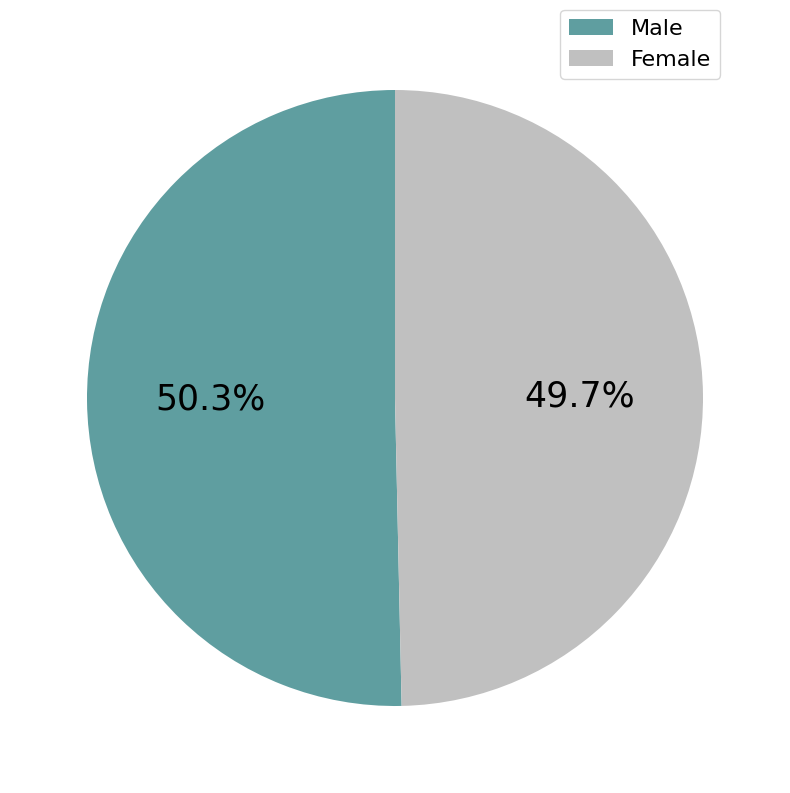

In [20]:
plot_pie_chart(people, 'customer_gender', colors = ['cadetblue', 'silver'], legend = ['Male', 'Female'])

#### `customer_education`

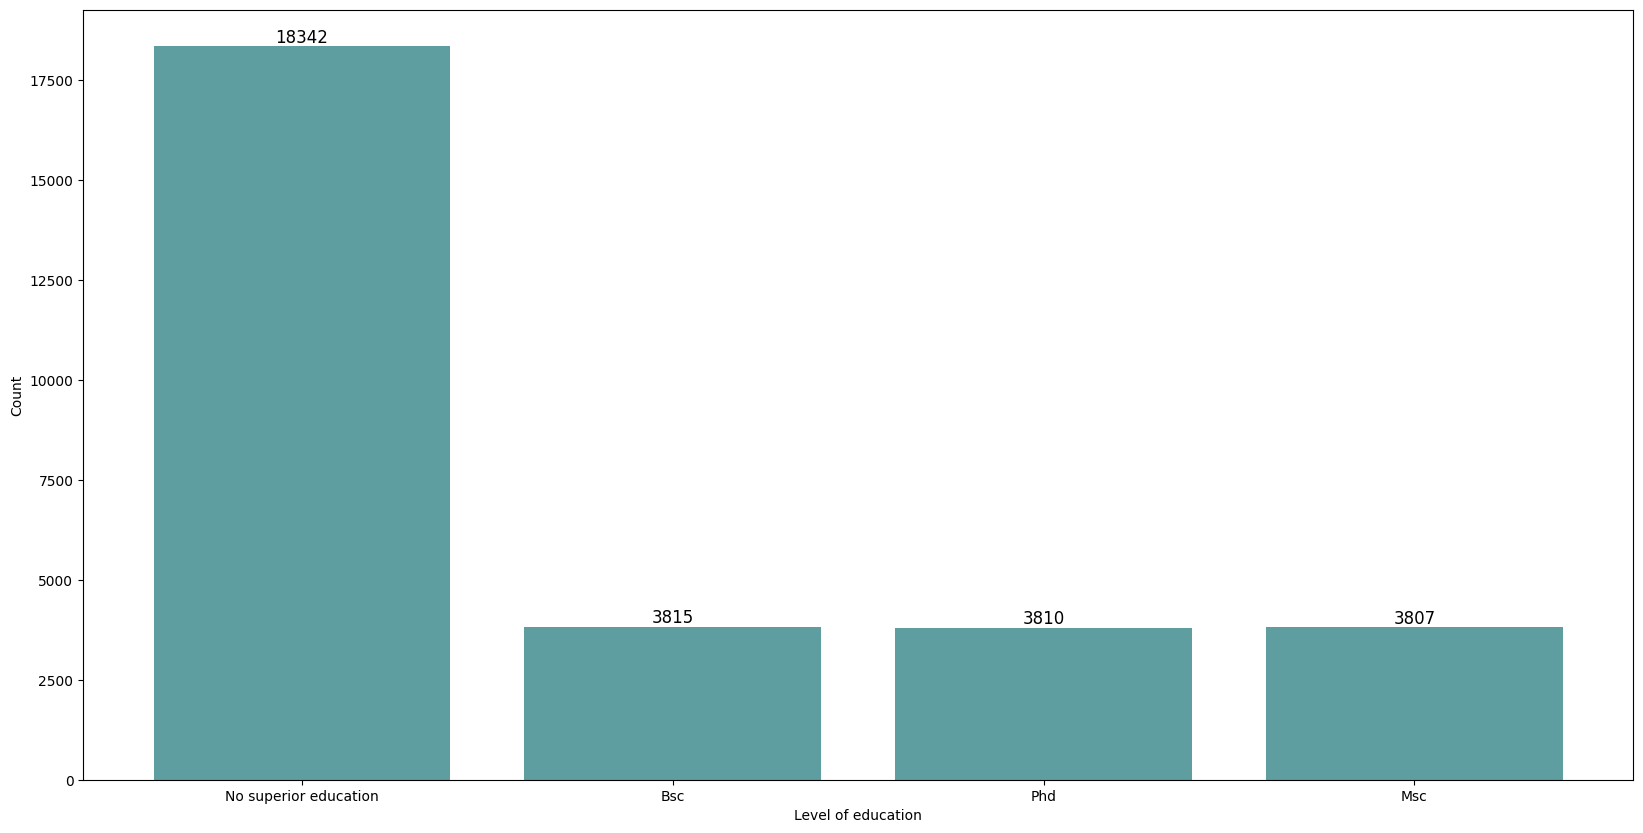

In [21]:
fig, ax = plt.subplots()
plot_bar_chart(ax, people, 'customer_education', 'Level of education', legend = ['No superior education', 'Bsc', 'Msc', 'Phd'], annotate = True)

#### `kids_home` & `teens_home`

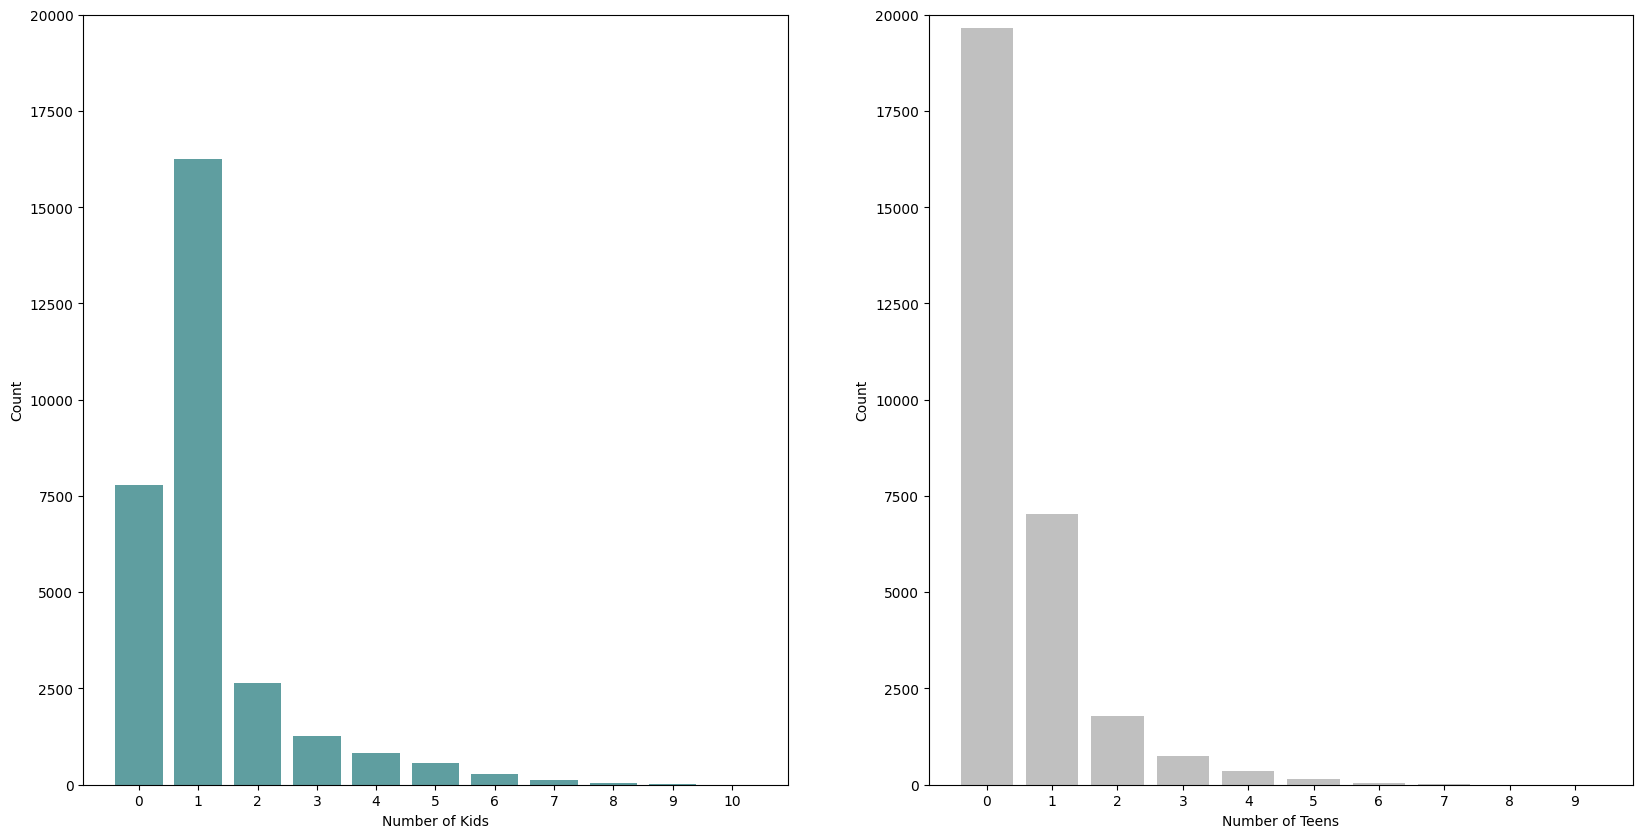

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_bar_chart(ax1, people, 'kids_home', 'Number of Kids', y_lim = [0, 20000])
plot_bar_chart(ax2, people, 'teens_home', 'Number of Teens', y_lim = [0, 20000], color = 'silver')

### Customer Behaviors

#### `customer_antiquity`

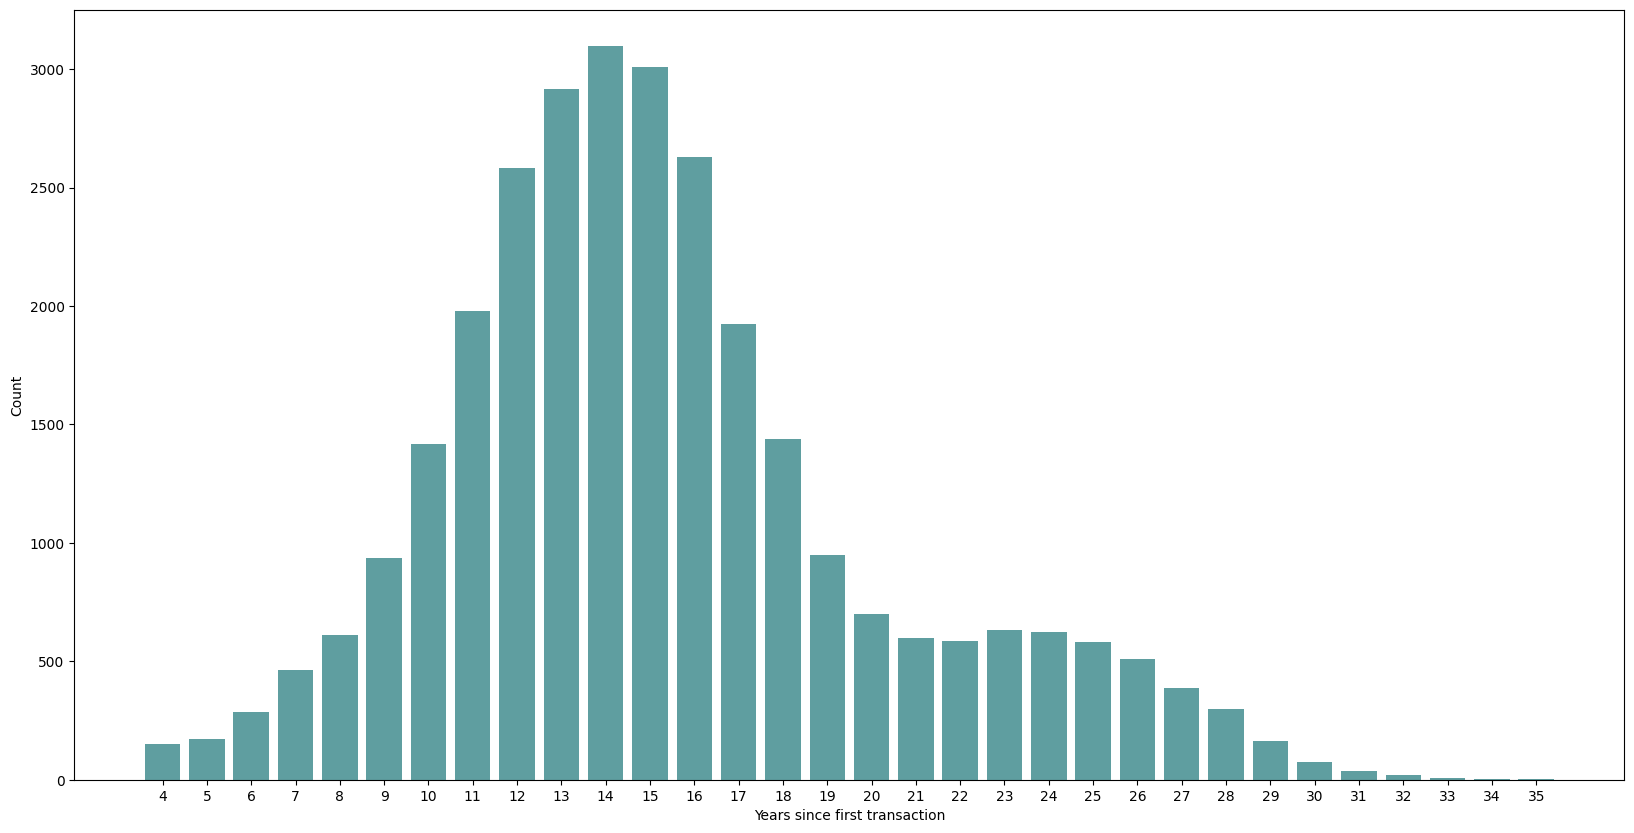

In [23]:
fig, ax = plt.subplots()
plot_bar_chart(ax, people, 'customer_antiquity', 'Years since first transaction')

#### `customer_loyalty`

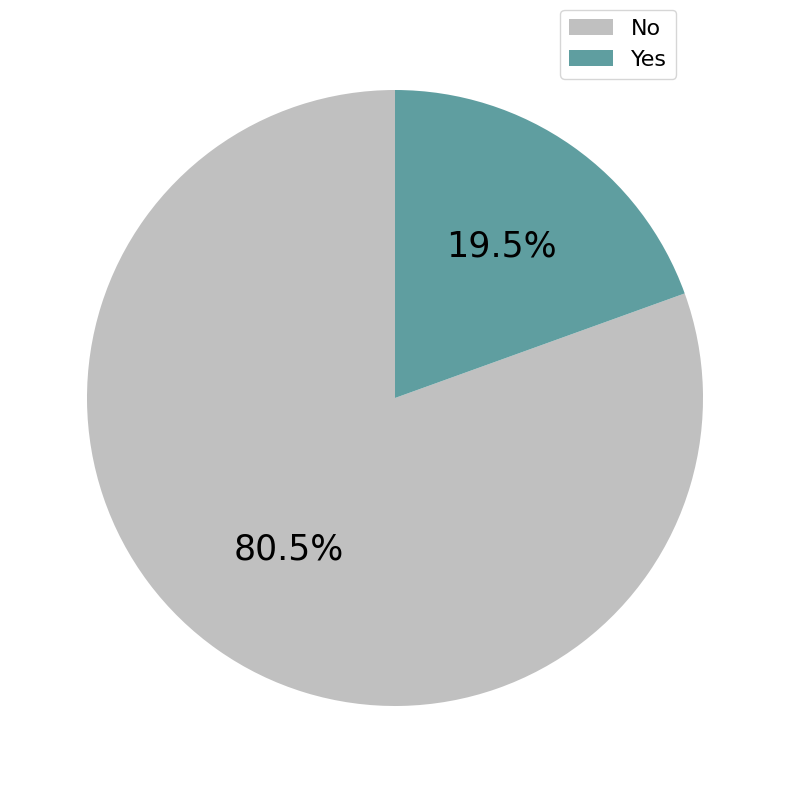

In [24]:
plot_pie_chart(people, 'customer_loyalty', colors = ['silver', 'cadetblue'], legend = ['No', 'Yes'])

#### `typical_hour`

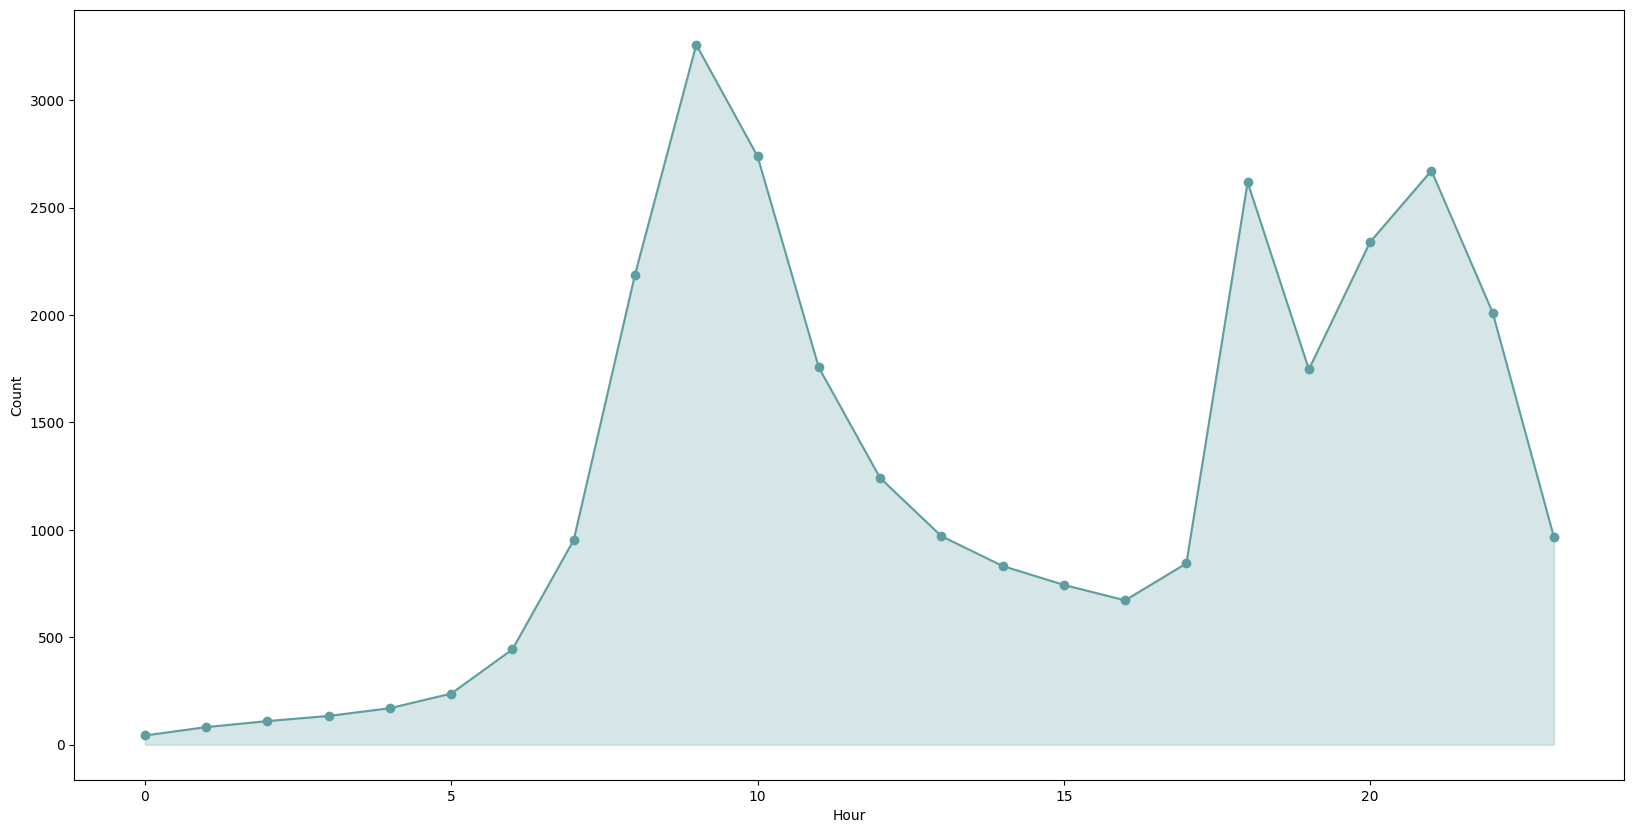

In [25]:
fig, ax = plt.subplots()
plot_line_chart(ax, people, 'typical_hour', 'Hour', fill = True)

#### `distinct_stores_visited`

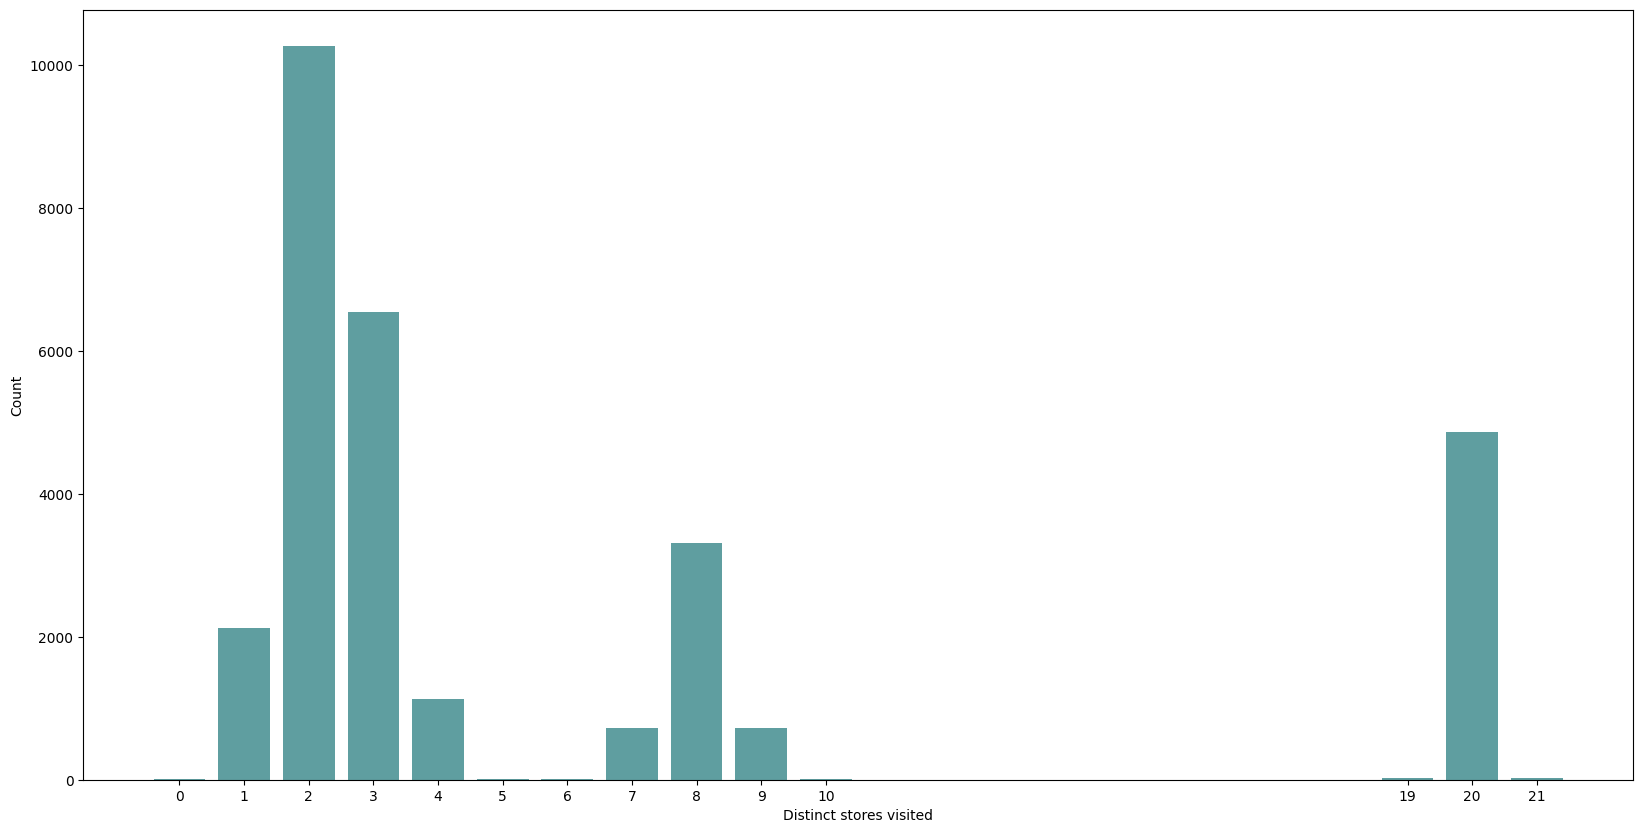

In [26]:
fig, ax = plt.subplots()
plot_bar_chart(ax, people, 'distinct_stores_visited', 'Distinct stores visited')

#### `total_distinct_products`

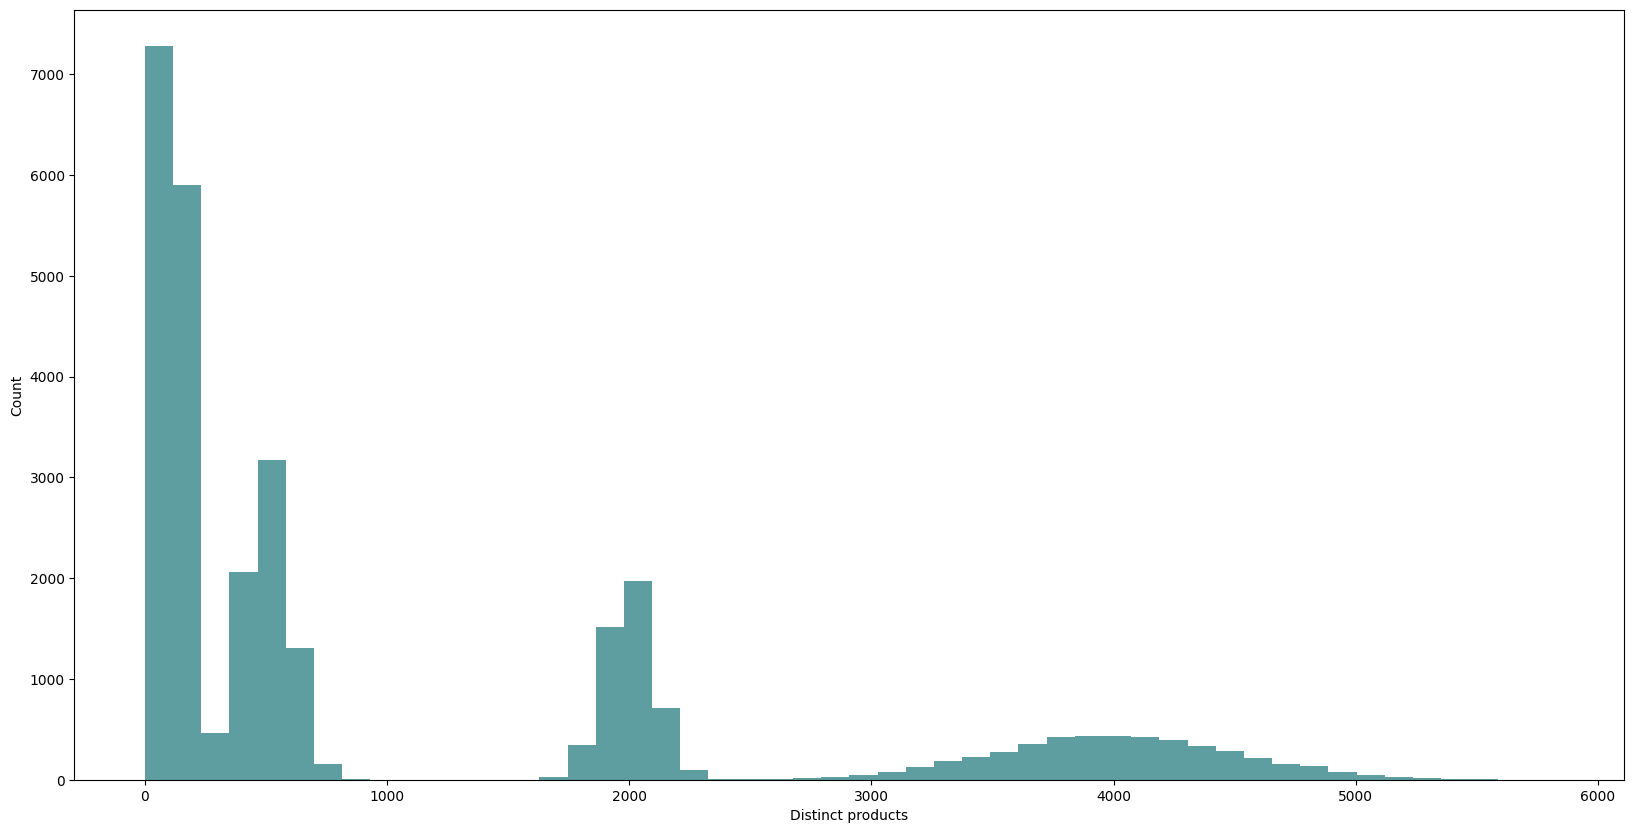

In [27]:
fig, ax = plt.subplots()
plot_histogram(ax, people, 'total_distinct_products', 'Distinct products')

#### `percentages_of_products_bought_promotion`

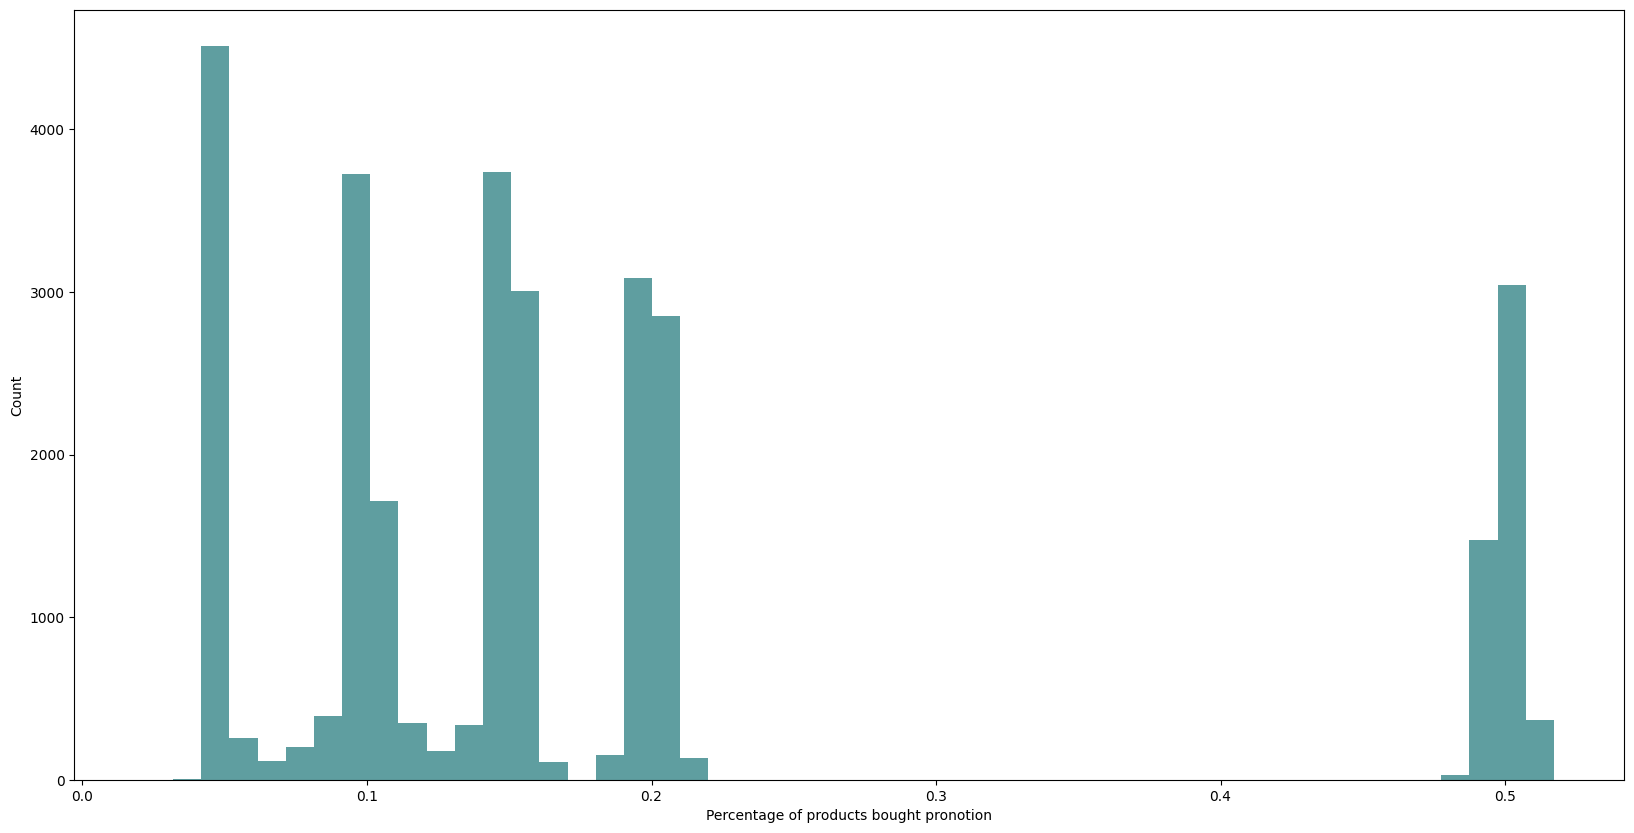

In [28]:
fig, ax = plt.subplots()
plot_histogram(ax, people, 'percentage_of_products_bought_promotion', 'Percentage of products bought pronotion')

#### `number_of_complaints`

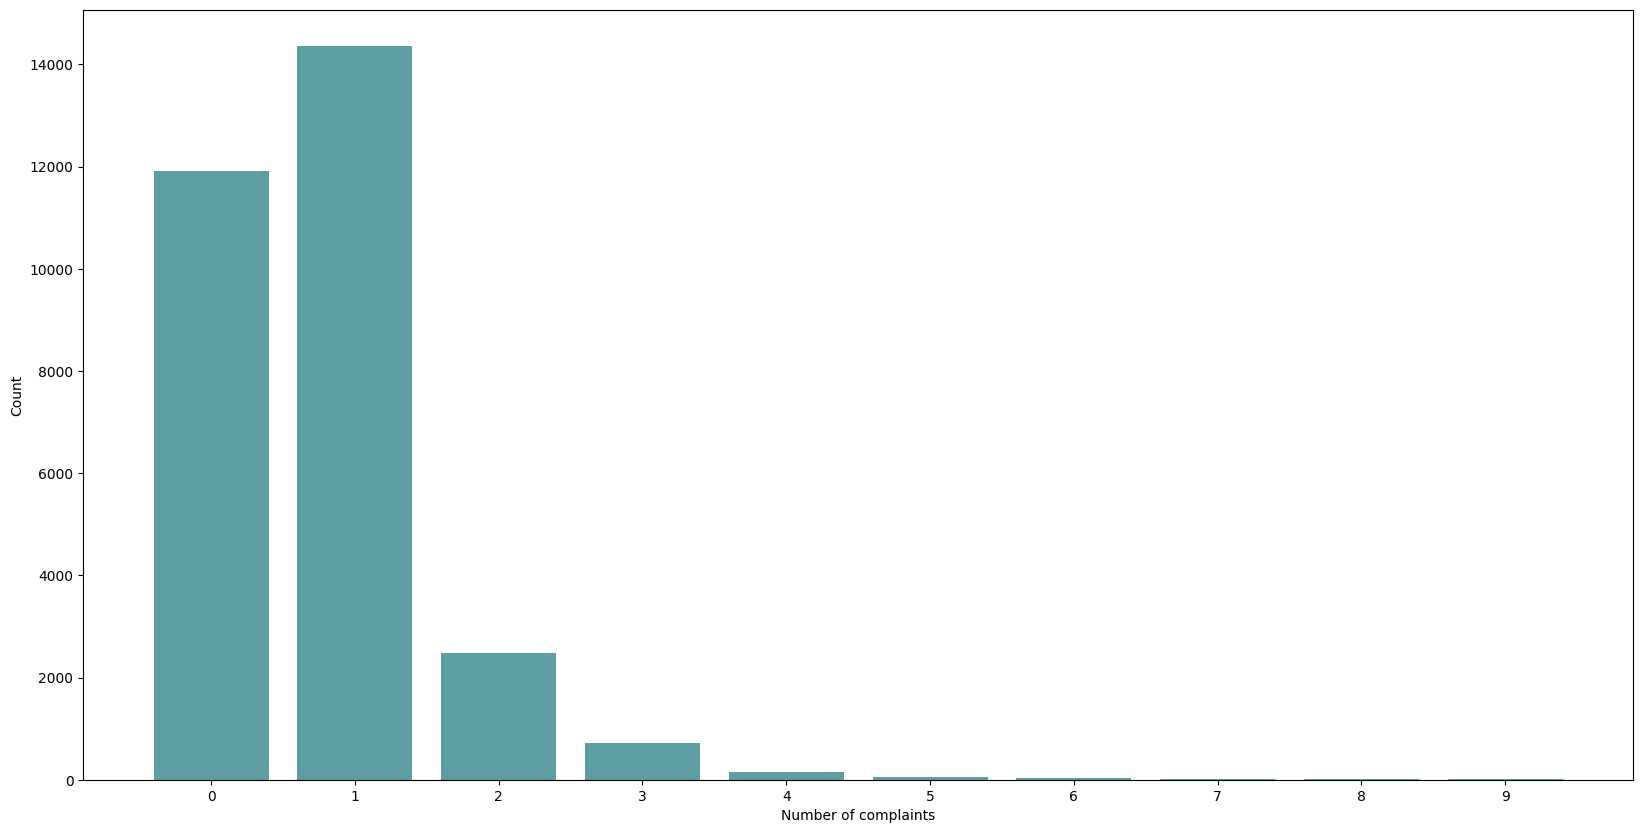

In [29]:
fig, ax = plt.subplots()
plot_bar_chart(ax, people, 'number_complaints', 'Number of complaints')

### Spends (Absolute & Relative)

#### spends

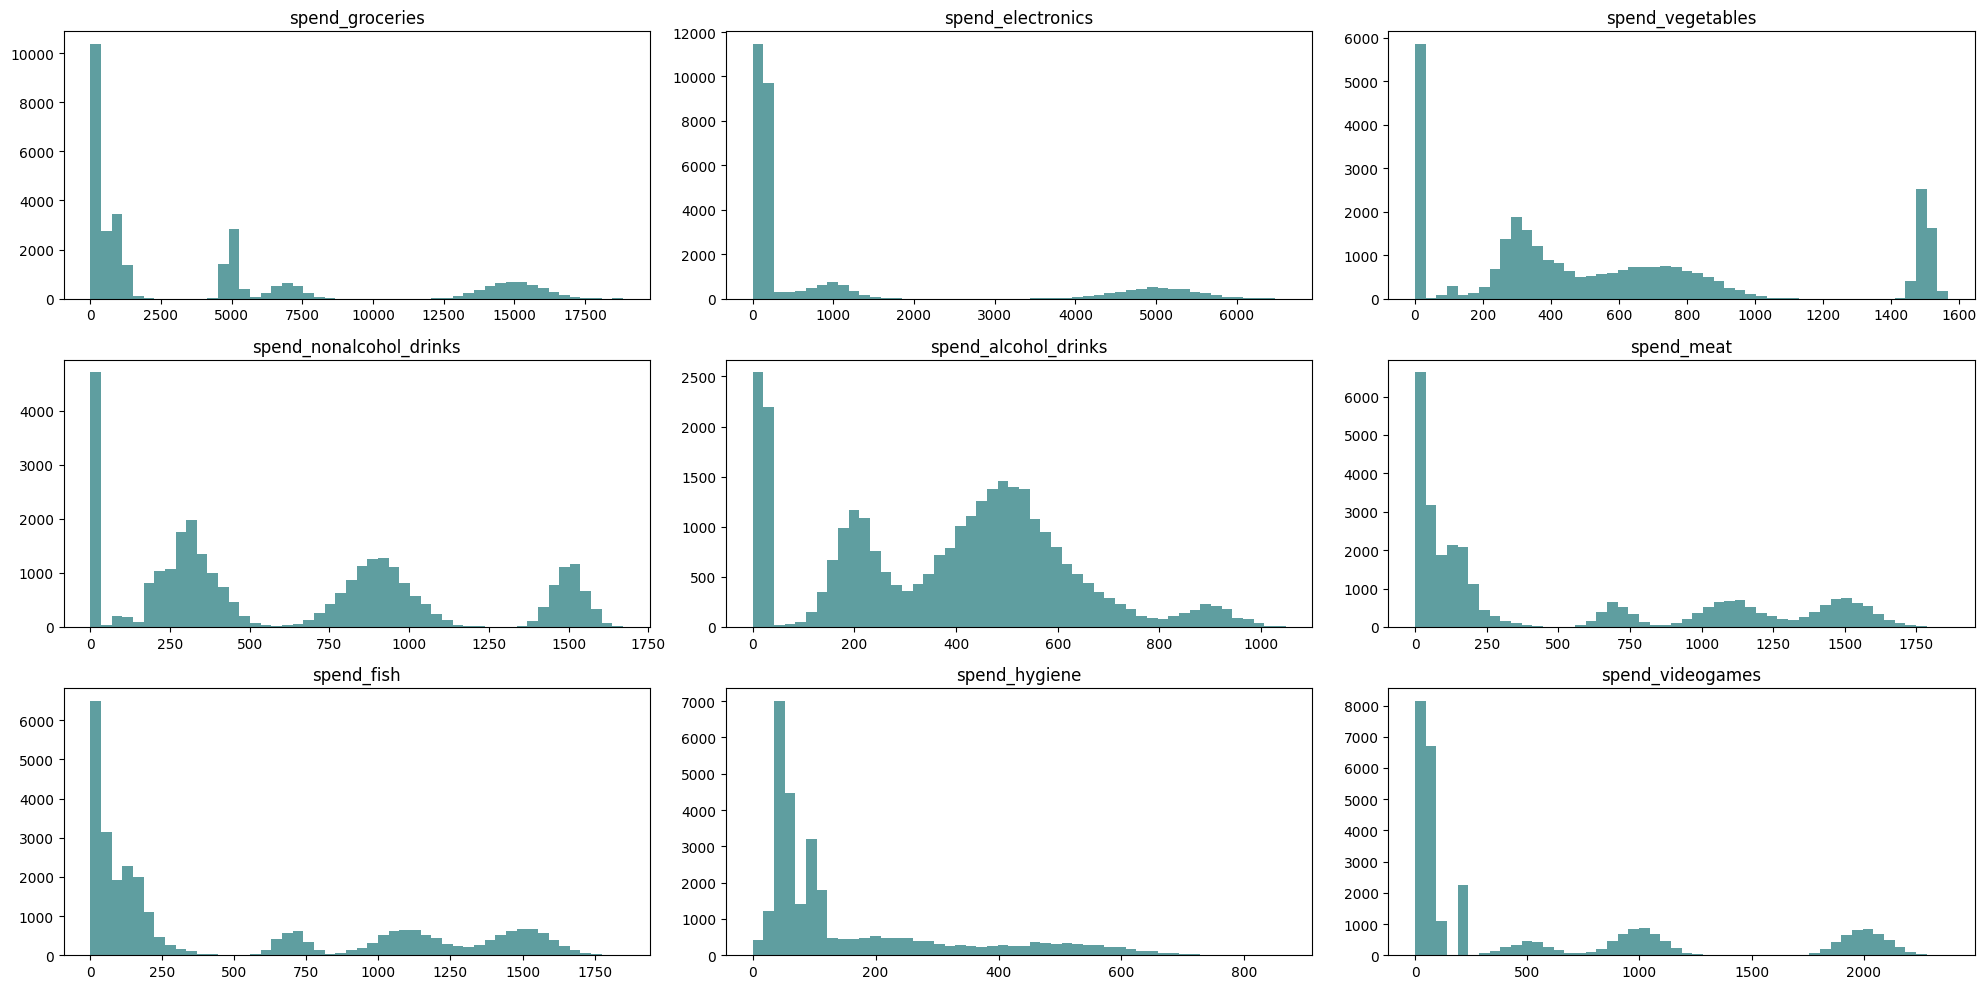

In [30]:
# Create a figure and axis objects using subplot(3, 3)
fig, axes = plt.subplots(3, 3)

# Iterate over the variable names and plot histograms on each axis
for i, var in enumerate(spends):
    ax = axes[i//3, i%3]  # Calculate the row and column index for the subplot
    ax.hist(people[var], bins = 50, color = 'cadetblue')  # Plot the histogram for the current variable
    ax.set_title(var)  # Set the title of the subplot

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

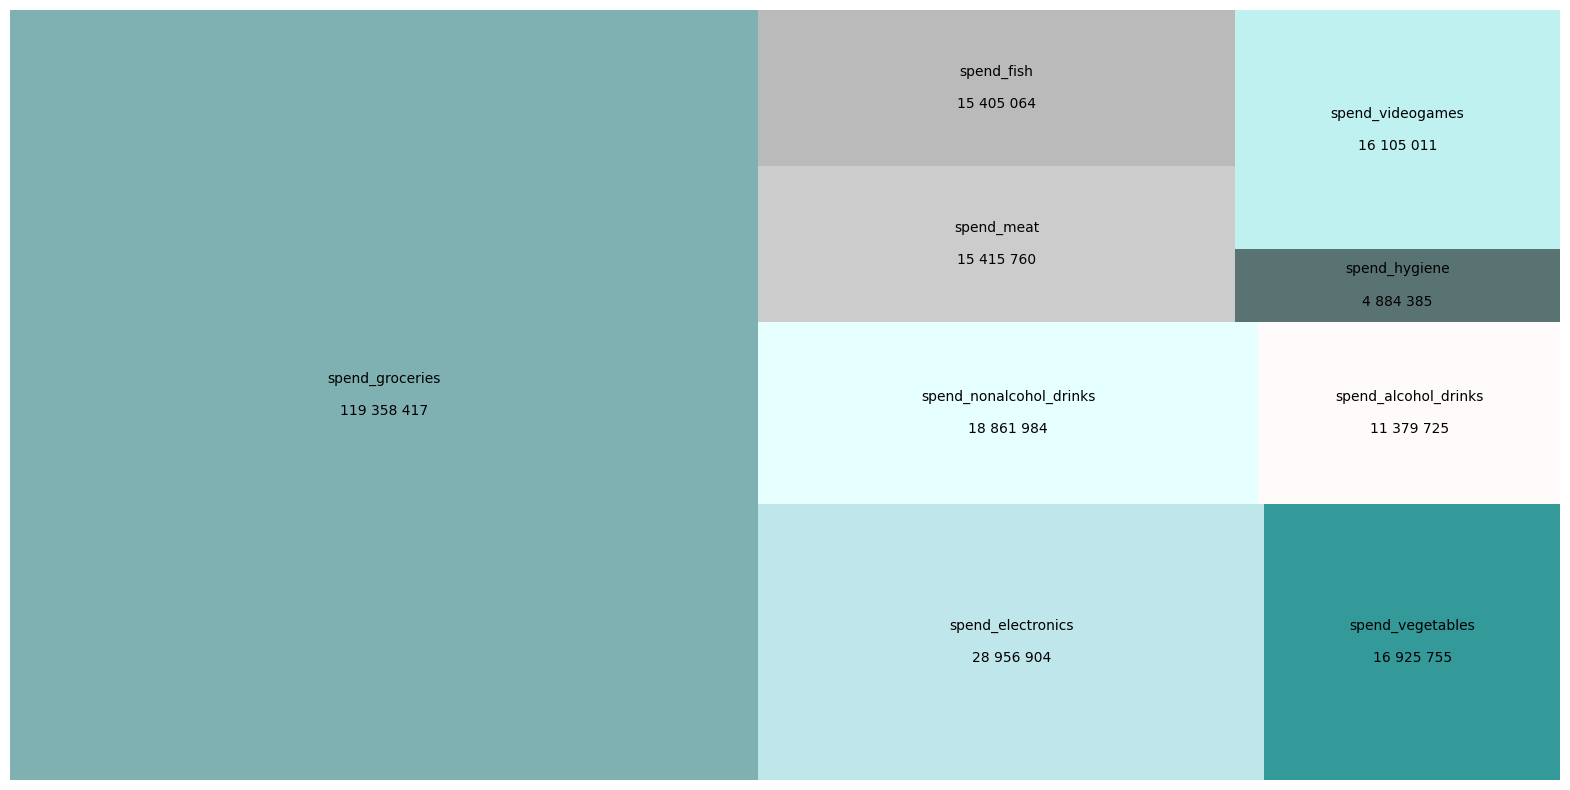

In [31]:
spends_sums = people.loc[:,spends].sum()
spend_labels = [f'{column_name}\n\n{value:,.0f}'.replace(",", " ") for column_name, value in zip(spends_sums.index, spends_sums.values)]
colors = [
    'cadetblue',
    'powderblue',
    'teal',
    'lightcyan',
    'snow',
    'silver',
    'darkgrey',
    'darkslategrey',
    'paleturquoise'
]

# Create the treemap
squarify.plot(sizes=spends_sums.values, label = spend_labels, color = colors, alpha=0.8)

# Add labels
plt.axis('off')

# Display the treemap
plt.show()

#### percentege_spends

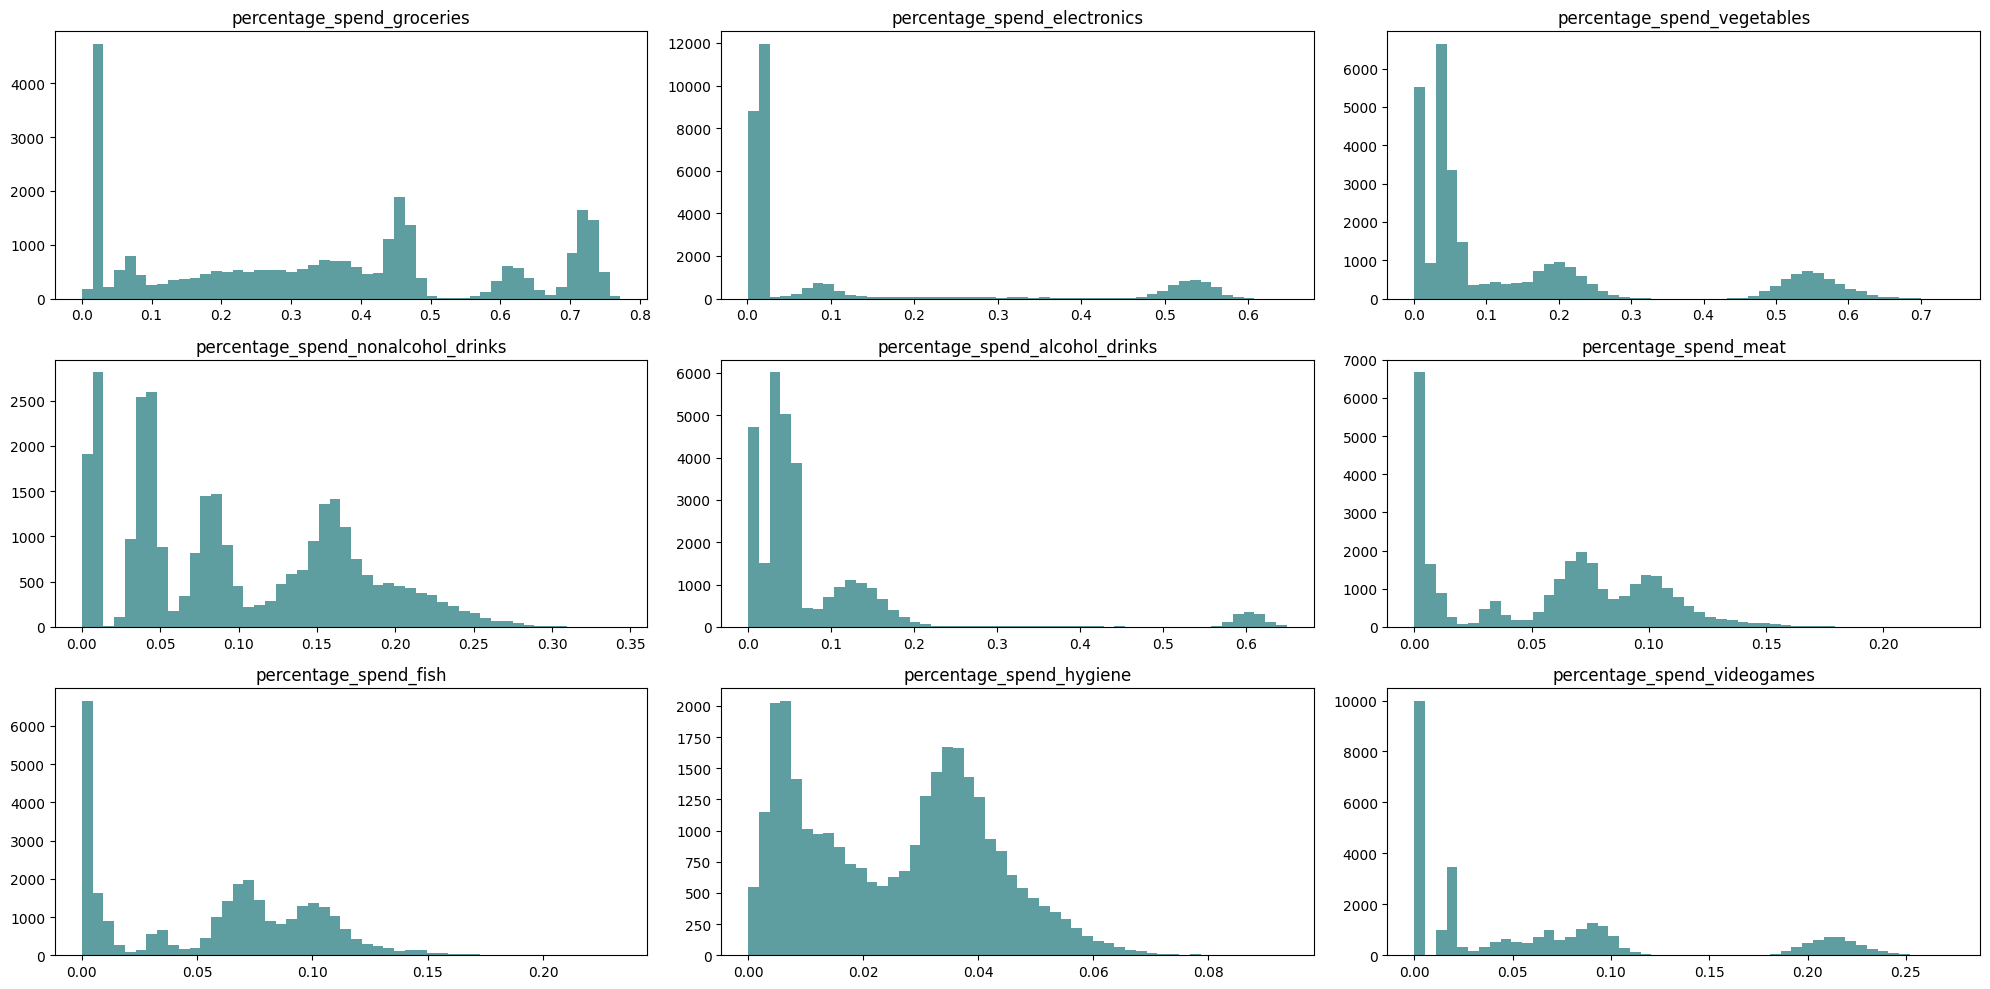

In [32]:
# Create a figure and axis objects using subplot(3, 3)
fig, axes = plt.subplots(3, 3)

# Iterate over the variable names and plot histograms on each axis
for i, var in enumerate(percentage_spends):
    ax = axes[i//3, i%3]  # Calculate the row and column index for the subplot
    ax.hist(people[var], bins = 50, color = 'cadetblue')  # Plot the histogram for the current variable
    ax.set_title(var)  # Set the title of the subplot

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

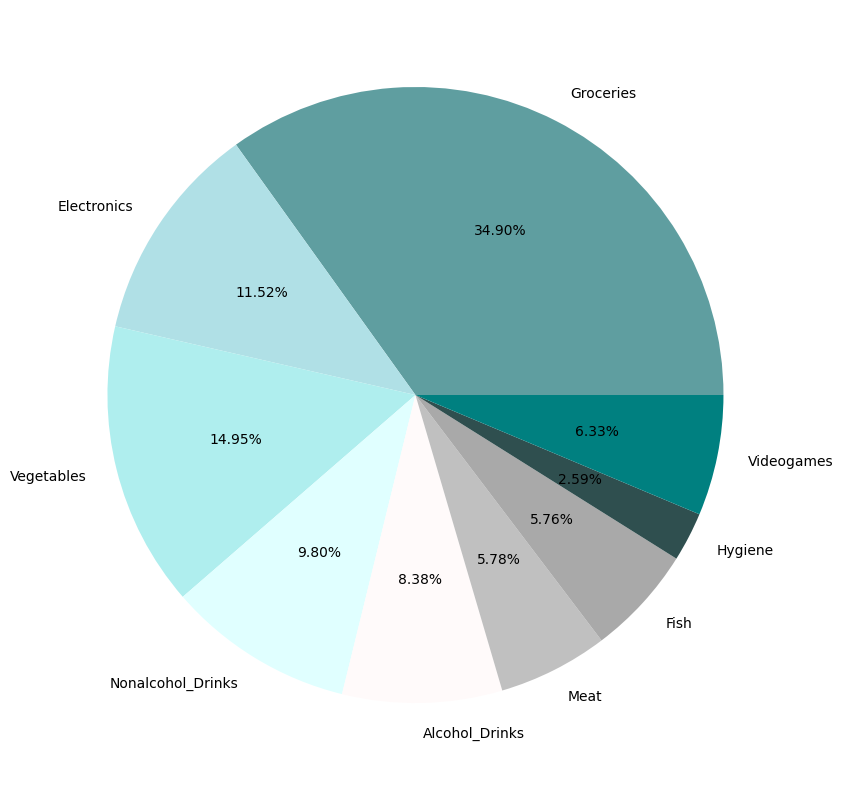

In [33]:
percentage_spends_means = people.iloc[:,-9:].mean()
spend_labels = [column_name.split('_', 1)[1].title() for column_name in spends]

colors = [
    'cadetblue',
    'powderblue',
    'paleturquoise',
    'lightcyan',
    'snow',
    'silver',
    'darkgrey',
    'darkslategrey',
    'teal'
]

# Create the pie chart
plt.pie(percentage_spends_means.values, labels = spend_labels, colors = colors, autopct = '%1.2f%%')
# plt.legend(spend_labels, fontsize = 12, bbox_to_anchor = (0.7, 0.9))

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.set_aspect('equal')

# Display the chart
plt.show()

## (Cor)relations

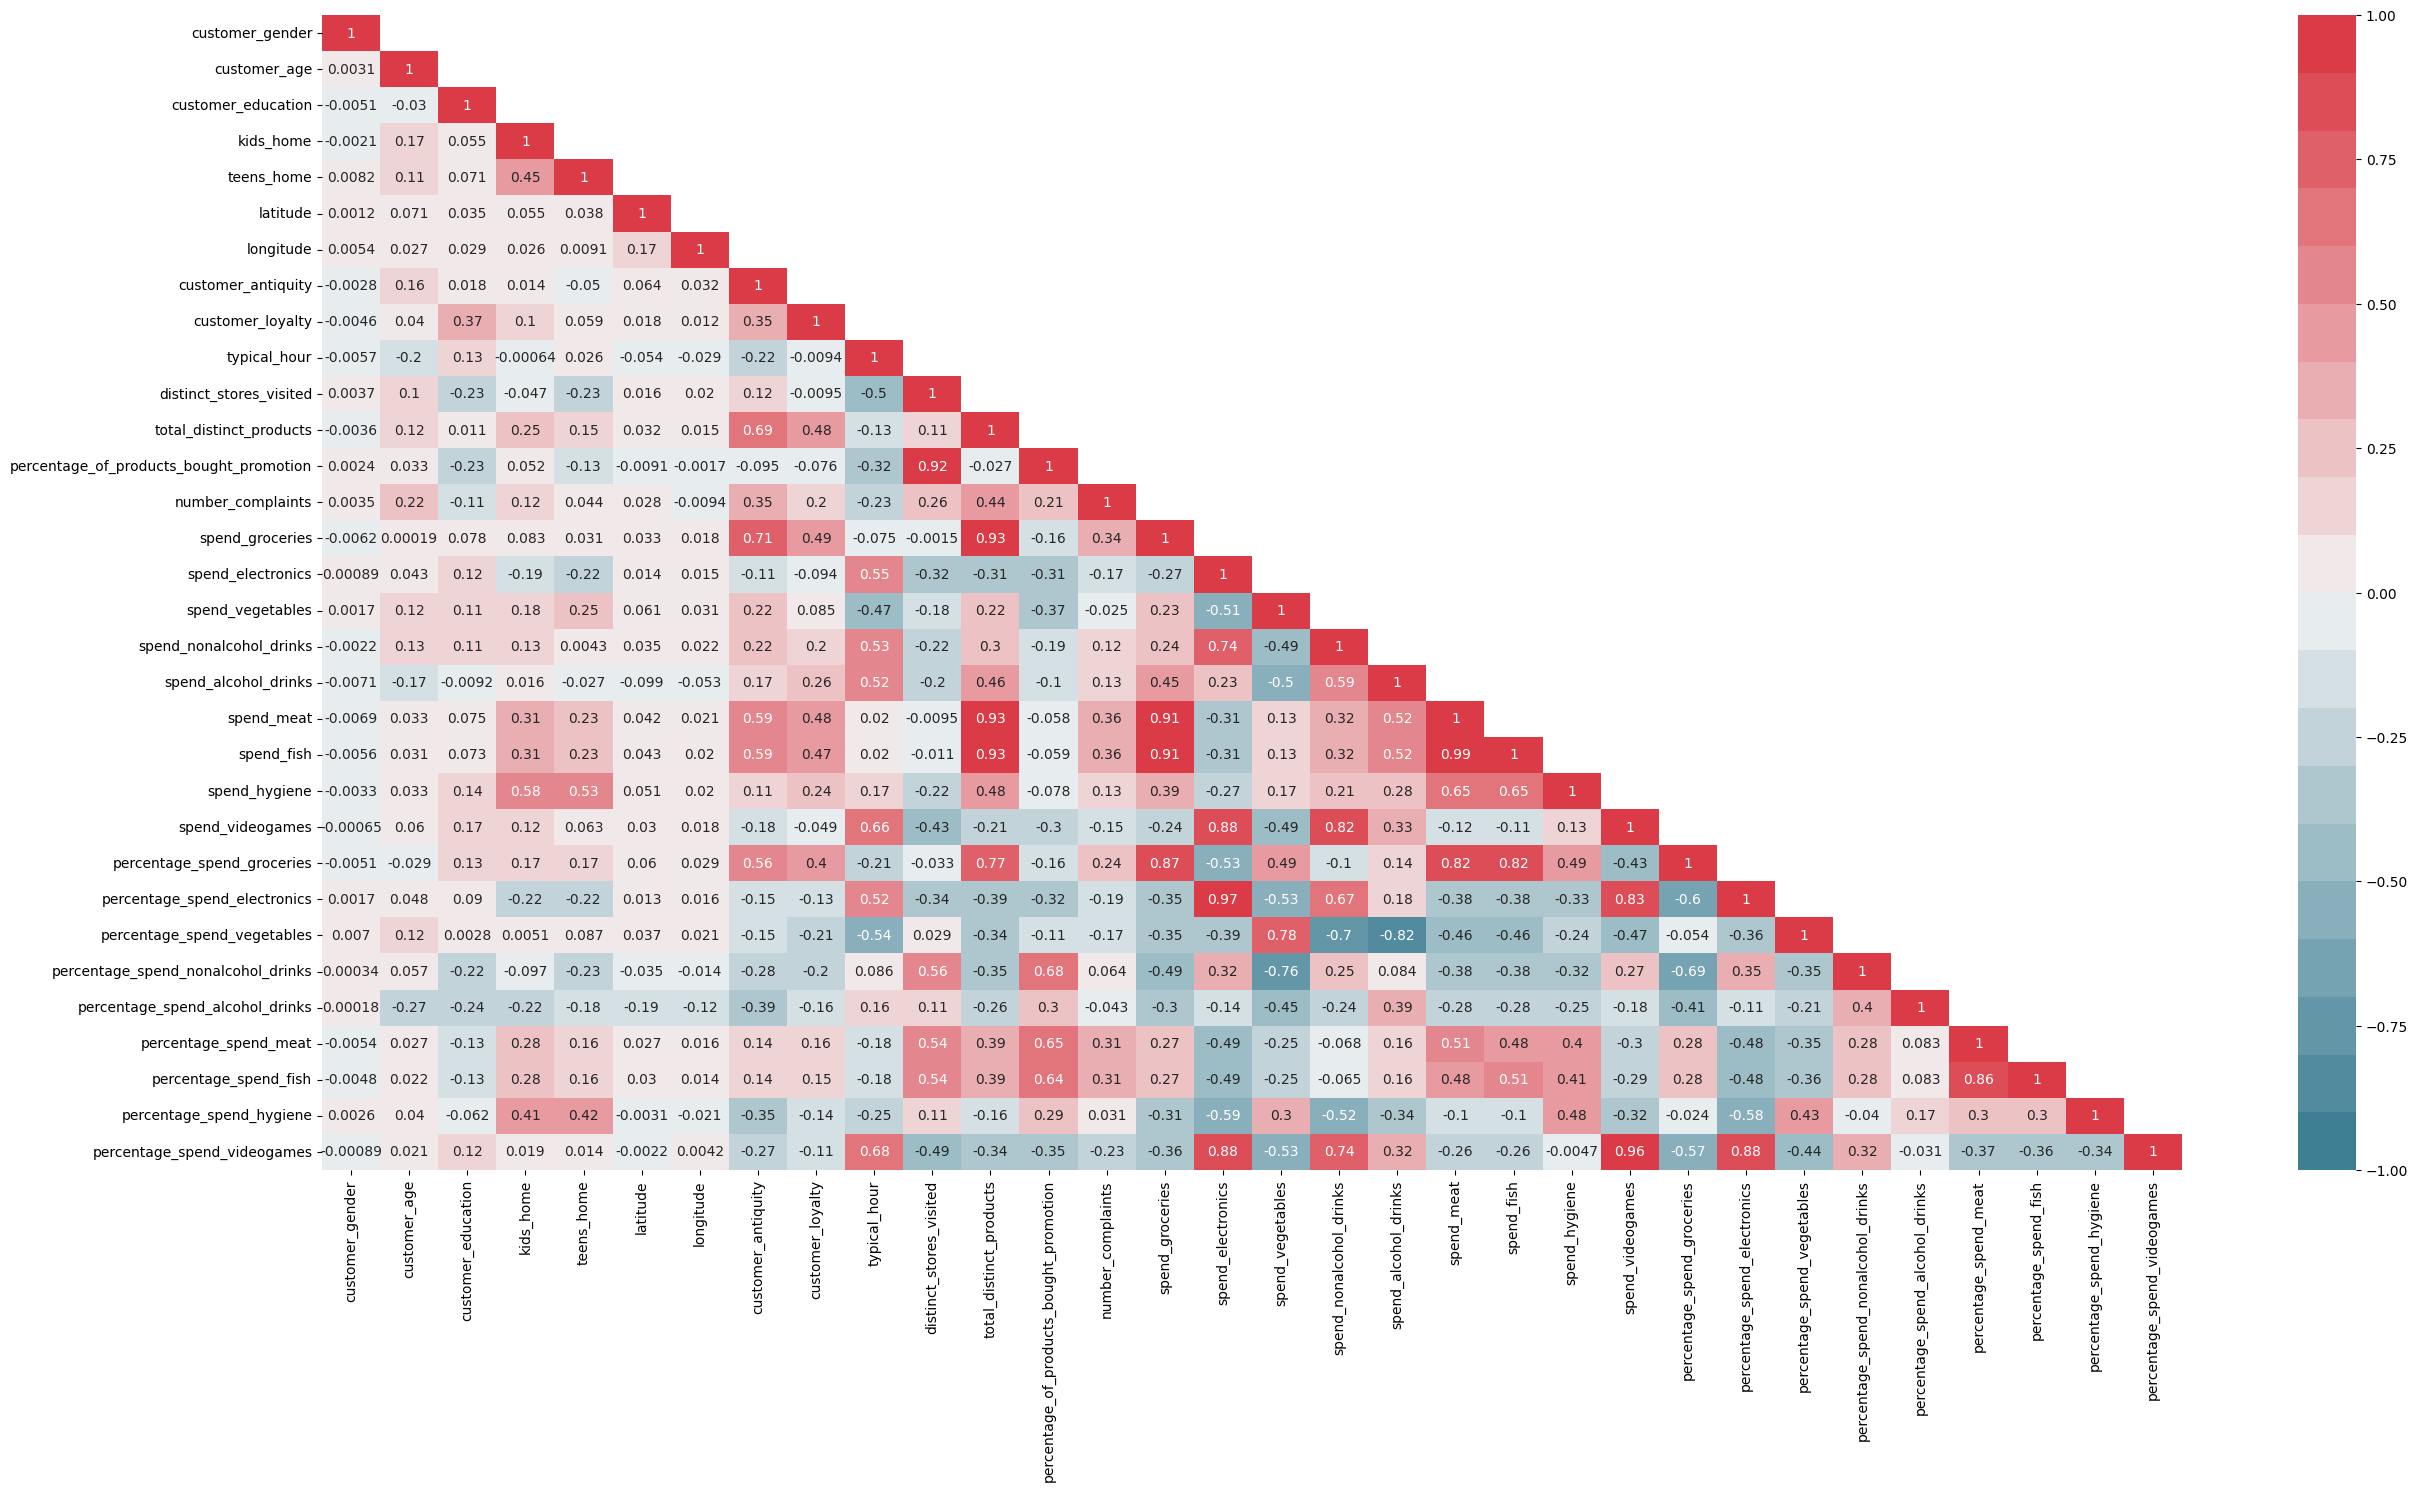

In [34]:
plot_correlation_matrix(people.iloc[:, 1:], 'pearson')

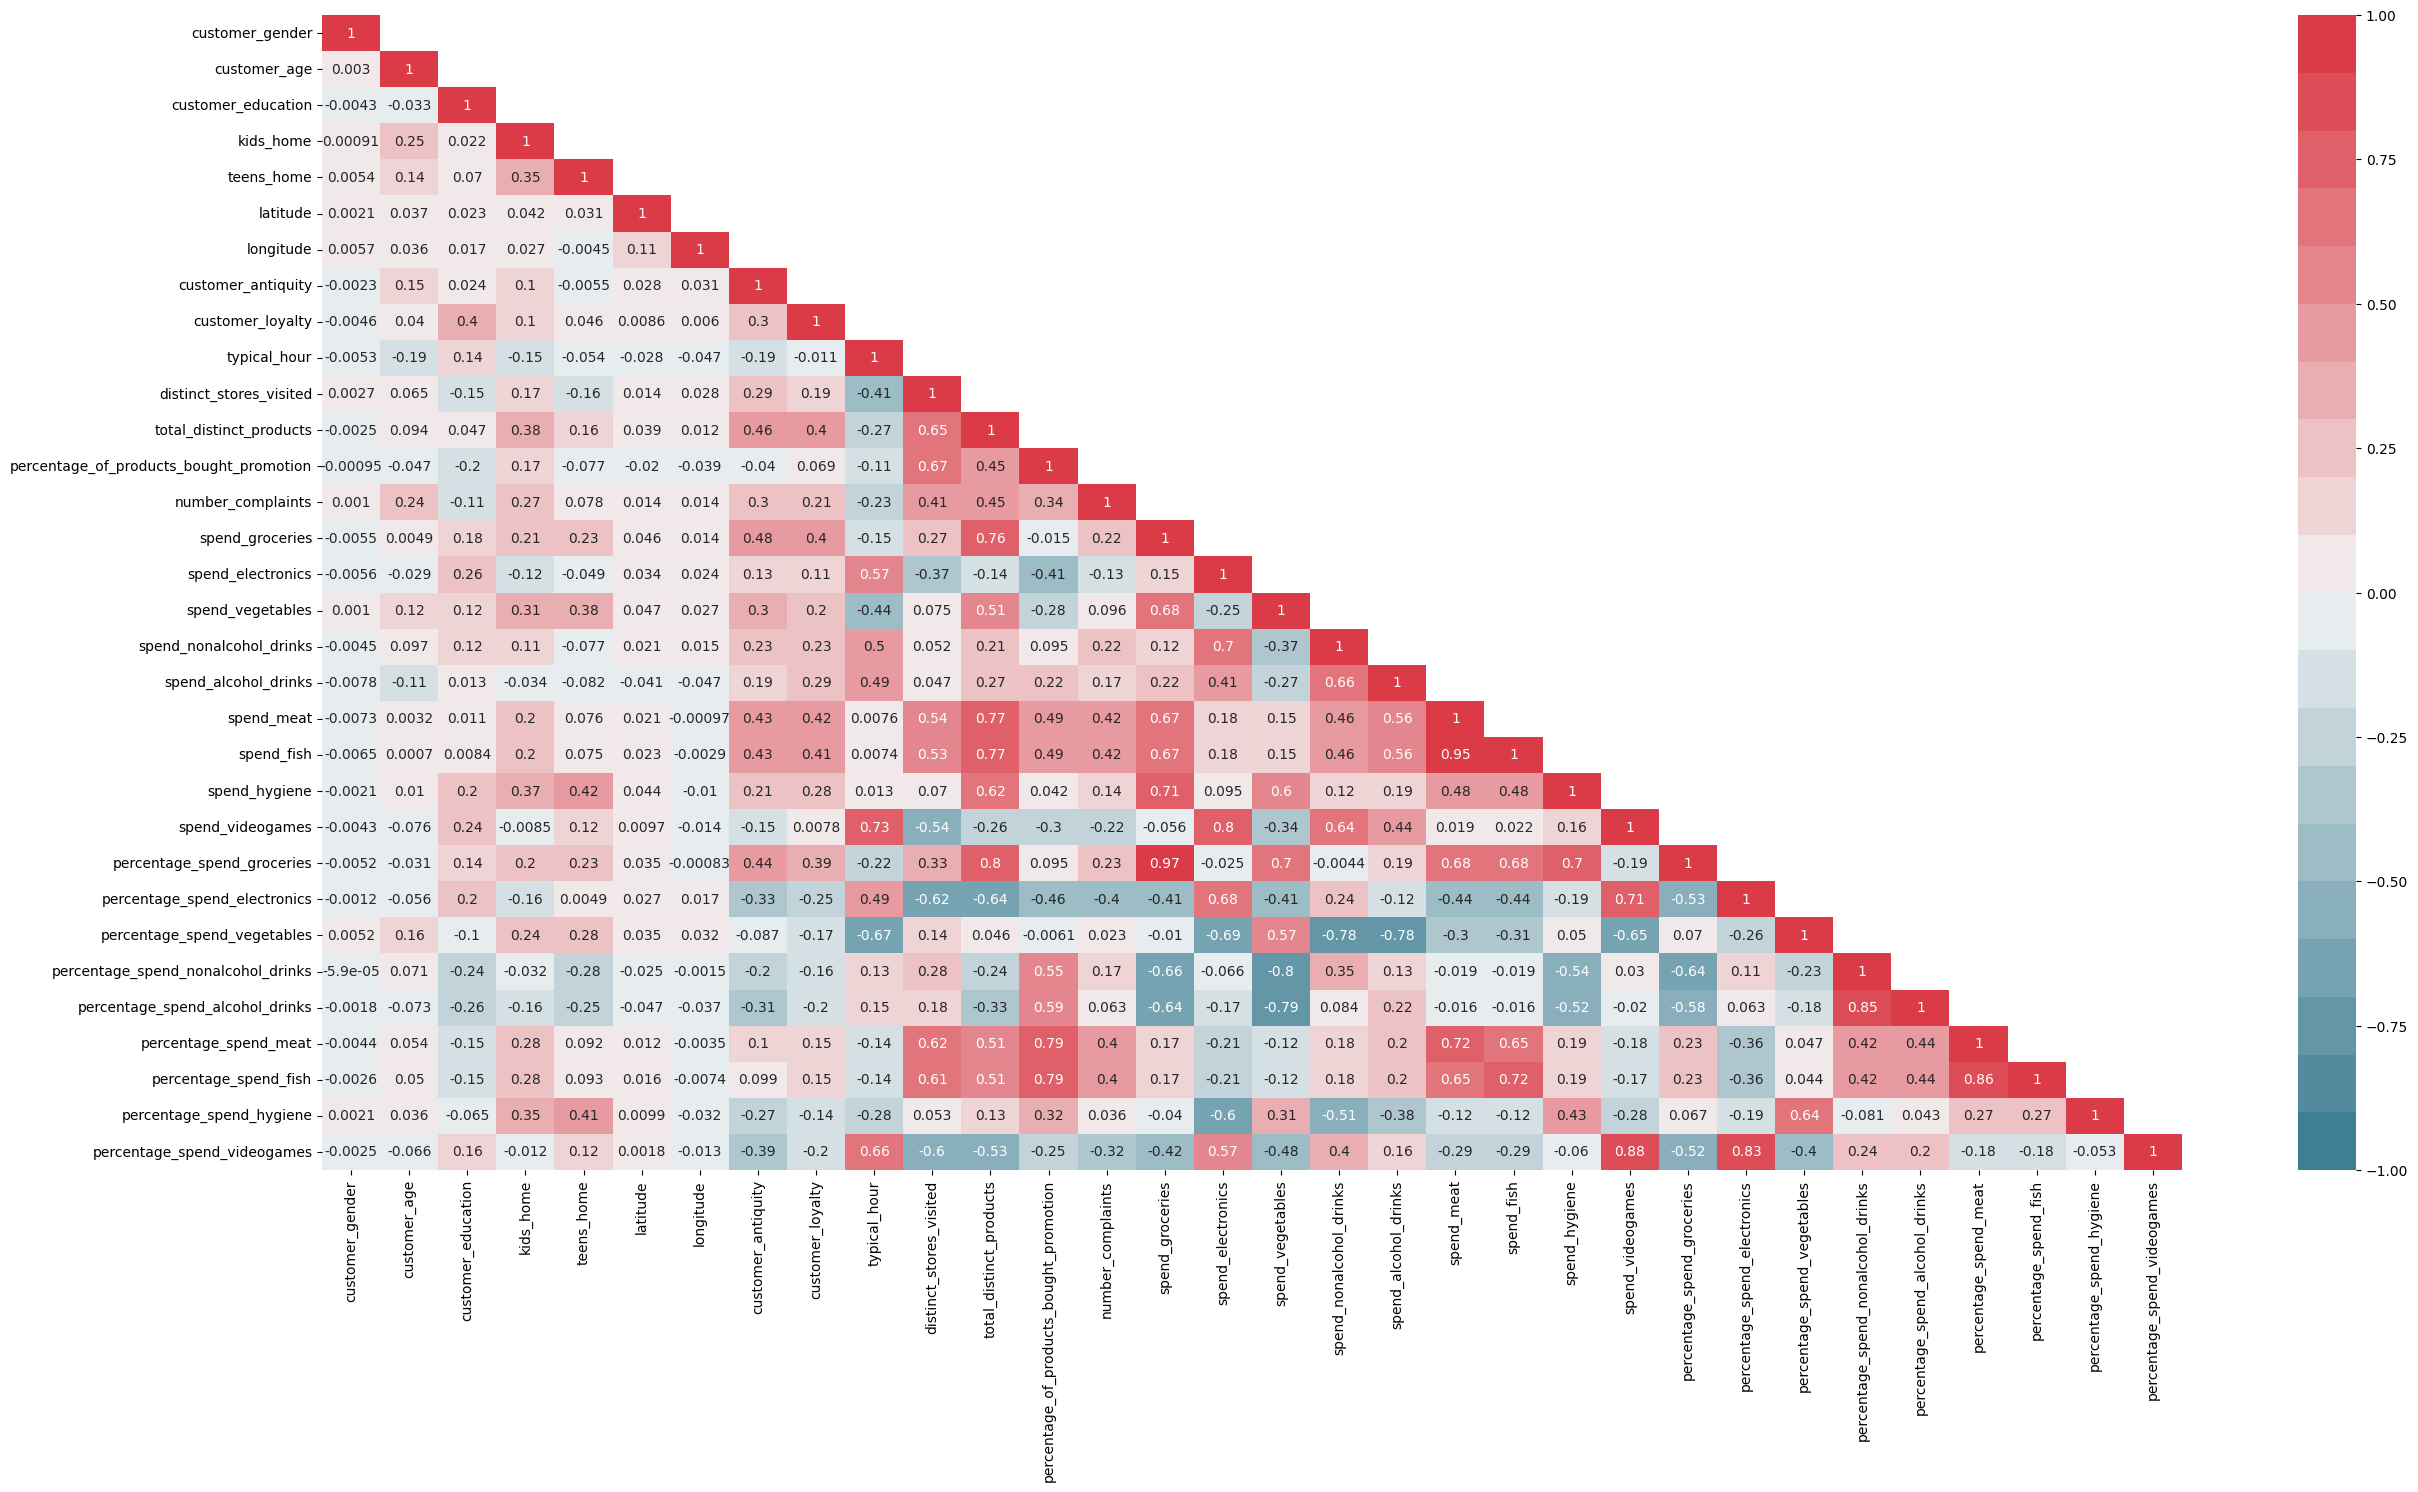

In [35]:
plot_correlation_matrix(people.iloc[:, 1:], 'spearman')

### `distinct_stores_visited` & `percentage_of_products_bought_promotion`

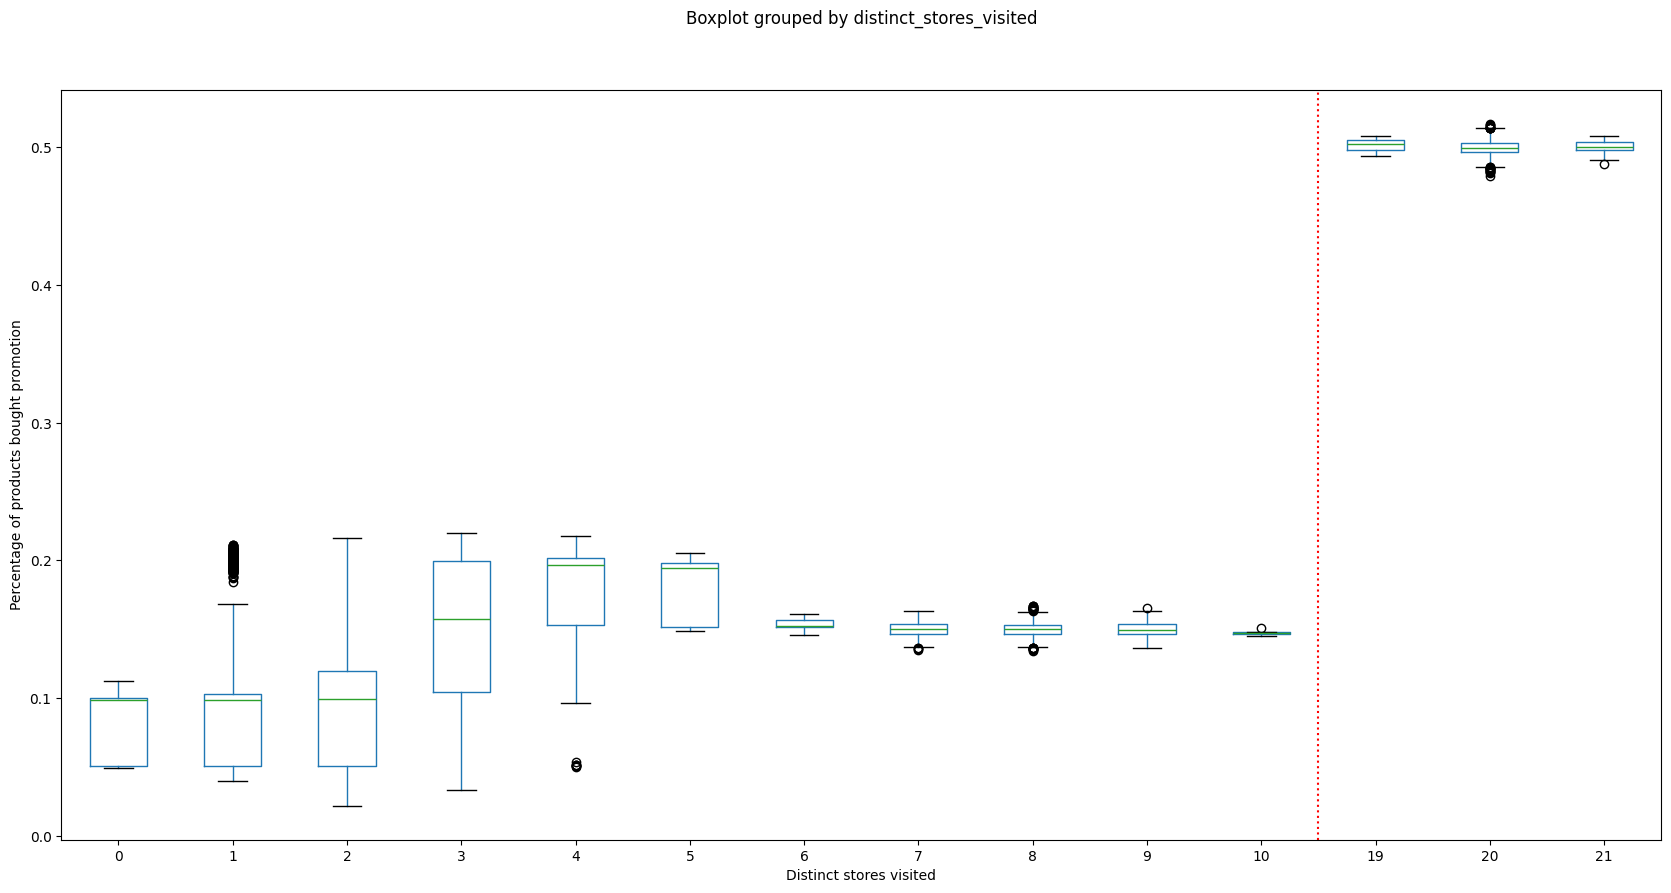

In [36]:
# Generate the boxplot
people[['distinct_stores_visited', 'percentage_of_products_bought_promotion']].boxplot(by = 'distinct_stores_visited')

# Remove the grid lines
plt.grid(visible=None)

# Remove the title
plt.title(None)

# Set the x-axis label
plt.xlabel('Distinct stores visited')

# Set the y-axis label
plt.ylabel('Percentage of products bought promotion')

# Add a vertical line at the separation point
plt.axvline(x=11.5, color='red', linestyle=':')

# Display the plot
plt.show()

### `spend_meat` & `spend_fish`

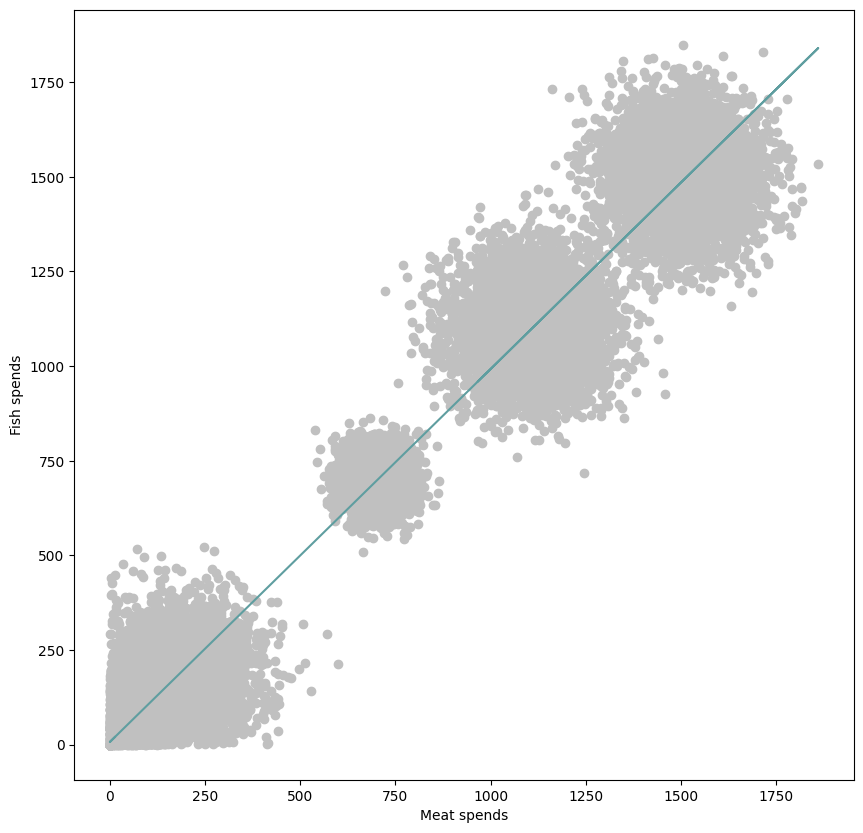

In [37]:
# Plot the scatter plot
plt.scatter(people.spend_meat, people.spend_fish, color='silver')

# Set the x-axis label
plt.xlabel('Meat spends')

# Set the y-axis label
plt.ylabel('Fish spends')

# Fit a linear regression line
m, b = np.polyfit(people.spend_meat, people.spend_fish, 1)
plt.plot(people.spend_meat, m * people.spend_meat + b, color='cadetblue')

# Set the aspect ratio of the plot
x_range = people.spend_meat.max() - people.spend_meat.min()
y_range = people.spend_fish.max() - people.spend_fish.min()
aspect_ratio = y_range / x_range
plt.gca().set_aspect(aspect_ratio)

# Display the plot
plt.show()

### `spend_meat` & `spend_fish` & `spend_groceries` & `total_distinct_products`

In [38]:
# Perform standard scaling on the numerical columns
people_st_scl = StandardScaler().fit_transform(people.iloc[:, 1:])

# Create a new DataFrame with the scaled values
people_st_scl = pd.DataFrame(people_st_scl, columns=people.iloc[:, 1:].columns, index=people.index)

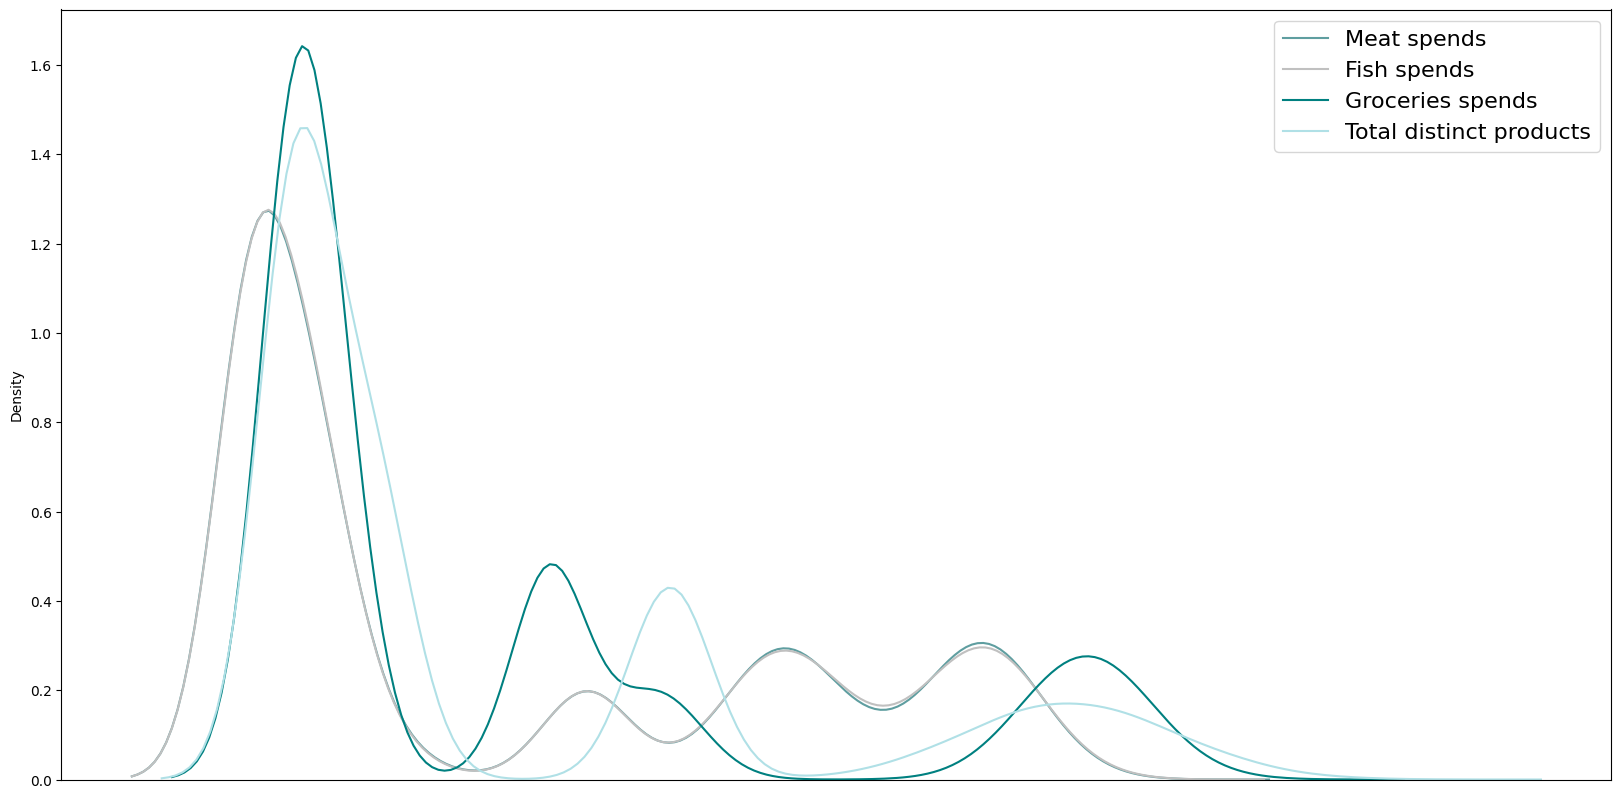

In [39]:
# Create KDE plots for the scaled numerical columns
sns.kdeplot(people_st_scl.spend_meat, color='cadetblue')
sns.kdeplot(people_st_scl.spend_fish, color='silver')
sns.kdeplot(people_st_scl.spend_groceries, color='teal')
sns.kdeplot(people_st_scl.total_distinct_products, color='powderblue')

# Set the legend and label the x-axis
plt.legend(['Meat spends', 'Fish spends', 'Groceries spends', 'Total distinct products'], fontsize=16)
plt.gca().set_xticks([])
plt.xlabel('')

# Display the plot
plt.show()

### `spend_videogames` & `spend_eletronics`/`spend_nonalcohol_drinks`/`percentage_spend_videogames`

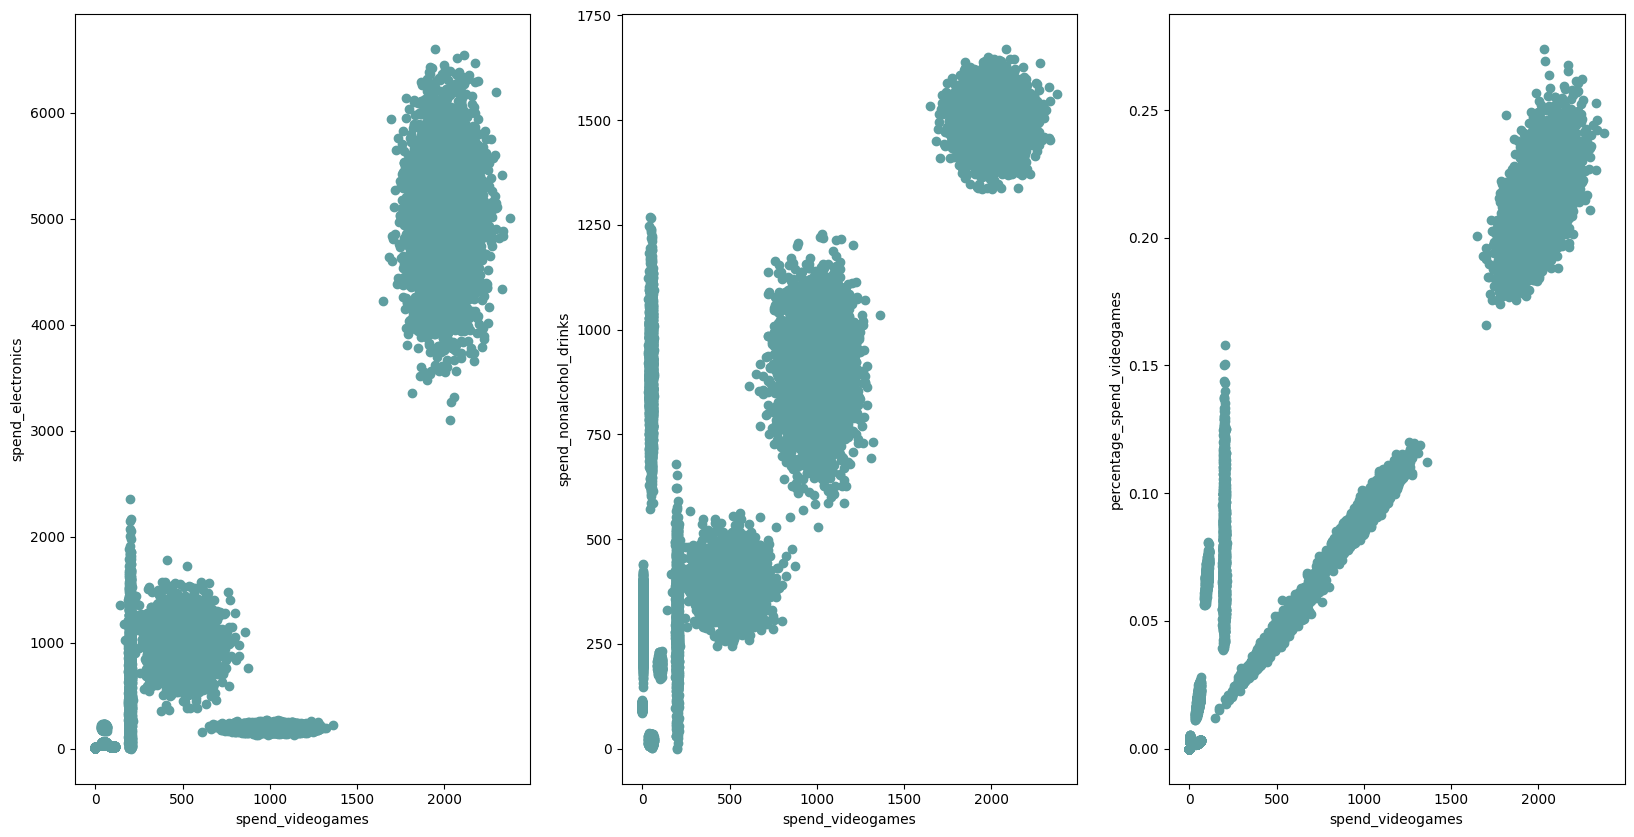

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plot_scatter(ax1, people, 'spend_videogames', 'spend_electronics')
plot_scatter(ax2, people, 'spend_videogames', 'spend_nonalcohol_drinks')
plot_scatter(ax3, people, 'spend_videogames', 'percentage_spend_videogames')

### `percentage_spend_alcohol_drinks` & `percentage_spend_nonalcohol_drinks`

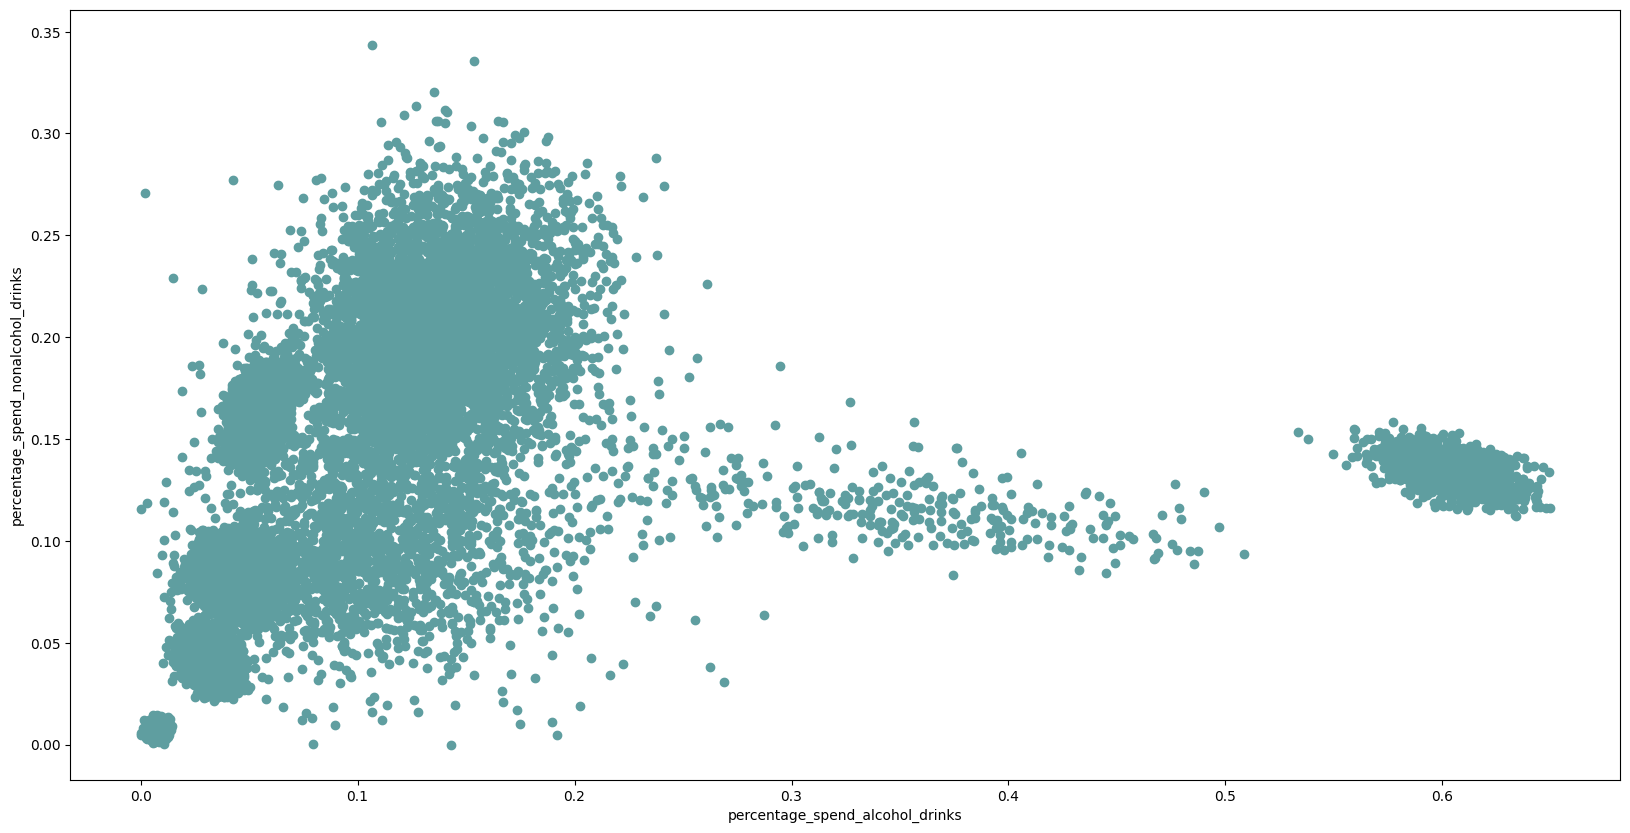

In [41]:
fig, ax = plt.subplots()
plot_scatter(ax, people, 'percentage_spend_alcohol_drinks', 'percentage_spend_nonalcohol_drinks')

# Supermarkets

In [42]:
supermarkets

customer_name  customer_gender  customer_age  kids_home  \
customer_id                                                                     
46             Angela`s Supermarket            False            27        0.0   
101             Annie`s Supermarket            False            77        0.0   
322            Jasmin`s Supermarket            False            31        0.0   
347           Mildred`s Supermarket            False            40        0.0   
532            Amanda`s Supermarket            False            80        0.0   
...                             ...              ...           ...        ...   
29418        Christie`s Supermarket            False            55        0.0   
29493           Kevin`s Supermarket             True            39        0.0   
29582          Robert`s Supermarket             True            43        0.0   
29641         Beverly`s Supermarket            False            51        0.0   
29953         Julissa`s Supermarket            False            37        0.0   

             teens_home  number_complaints  distinct_stores_visited  \
customer_id                                                           
46                  0.0                0.0                      1.0   
101                 0.0                0.0                      1.0   
322                 0.0                0.0                      1.0   
347                 0.0                0.0                      1.0   
532                 0.0                0.0                      1.0   
...                 ...                ...                      ...   
29418               0.0                0.0                      1.0   
29493               0.0                0.0                      1.0   
29582               0.0                0.0                      1.0   
29641               0.0                0.0                      1.0   
29953               0.0                0.0                      1.0   

             spend_groceries  spend_electronics  typical_hour  ...  longitude  \
customer_id                                                    ...              
46                  2.705992           1.158682      0.641237  ...  -9.111133   
101                 2.659180           1.133150          -inf  ...  -9.111718   
322                 2.676792           1.107704      0.599474  ...  -9.111617   
347                 2.737113           1.163490      0.274653  ...  -9.111169   
532                 2.708327           1.222587      0.641237  ...  -9.111093   
...                      ...                ...           ...  ...        ...   
29418               2.722517           1.095507      0.761131  ...  -9.111368   
29493               2.664996           1.177383      0.722593  ...  -9.110838   
29582               2.796716           1.141087      0.677013  ...  -9.110785   
29641               2.709704           1.124952      0.659764  ...  -9.111527   
29953               2.669398           1.165860      0.274653  ...  -9.111324   

             percentage_spend_groceries  percentage_spend_electronics  \
customer_id                                                             
46                                 -0.0                          -0.0   
101                                -0.0                          -0.0   
322                                -0.0                          -0.0   
347                                -0.0                          -0.0   
532                                -0.0                          -0.0   
...                                 ...                           ...   
29418                              -0.0                          -0.0   
29493                              -0.0                          -0.0   
29582                              -0.0                          -0.0   
29641                              -0.0                          -0.0   
29953                              -0.0                          -0.0   

             percentage_spend_vegetables

In [43]:
supermarkets.describe().T

count          mean         std  \
customer_age                             226.0  5.161062e+01   17.667514   
kids_home                                226.0  0.000000e+00    0.000000   
teens_home                               226.0  0.000000e+00    0.000000   
number_complaints                        226.0  0.000000e+00    0.000000   
distinct_stores_visited                  226.0  1.000000e+00    0.000000   
spend_groceries                          226.0  2.701444e+00    0.057132   
spend_electronics                        226.0  1.149498e+00    0.026245   
typical_hour                             226.0          -inf         NaN   
spend_vegetables                         226.0  2.124160e+00    0.026242   
spend_nonalcohol_drinks                  226.0  2.302082e+00    0.012521   
spend_alcohol_drinks                     226.0  2.704784e+00    0.002484   
spend_meat                               226.0  2.615967e+00    0.003245   
spend_fish                               226.0  3.499775e+04  495.891236   
spend_hygiene                            226.0  1.553669e+00    0.010453   
spend_videogames                         226.0          -inf         NaN   
total_distinct_products                  226.0  9.779300e-01    0.025608   
percentage_of_products_bought_promotion  226.0  2.001512e-01    0.004945   
customer_antiquity                       226.0  1.396903e+01    2.908060   
customer_loyalty                         226.0  1.017699e-01    0.303017   
latitude                                 226.0  3.886628e+01    0.000290   
longitude                                226.0 -9.111225e+00    0.000294   
percentage_spend_groceries               226.0  0.000000e+00    0.000000   
percentage_spend_electronics             226.0  0.000000e+00    0.000000   
percentage_spend_vegetables              226.0  0.000000e+00    0.000000   
percentage_spend_nonalcohol_drinks       226.0  0.000000e+00    0.000000   
percentage_spend_alcohol_drinks          226.0  0.000000e+00    0.000000   
percentage_spend_meat                    226.0  0.000000e+00    0.000000   
percentage_spend_fish                    226.0  0.000000e+00    0.000000   
percentage_spend_hygiene                 226.0  0.000000e+00    0.000000   
percentage_spend_videogames                0.0           NaN         NaN   

                                                  min           25%  \
customer_age                             2.300000e+01     36.000000   
kids_home                                0.000000e+00      0.000000   
teens_home                               0.000000e+00      0.000000   
number_complaints                        0.000000e+00      0.000000   
distinct_stores_visited                  1.000000e+00      1.000000   
spend_groceries                          2.423006e+00      2.669260   
spend_electronics                        1.058527e+00      1.130447   
typical_hour                                     -inf      0.575646   
spend_vegetables                         2.042546e+00      2.105281   
spend_nonalcohol_drinks                  2.266444e+00      2.293678   
spend_alcohol_drinks                     2.697901e+00      2.703110   
spend_meat                               2.608028e+00      2.613883   
spend_fish                               3.347900e+04  34664.750000   
spend_hygiene                            1.527867e+00      1.546552   
spend_videogames                                 -inf           NaN   
total_distinct_products                  8.888370e-01      0.962537   
percentage_of_products_bought_promotion  1.888230e-01      0.196581   
customer_antiquity                       7.000000e+00     12.000000   
customer_loyalty                         0.000000e+00      0.000000   
latitude                                 3.886578e+01     38.866025   
longitude                               -9.111733e+00     -9.111487   
percentage_spend_groceries              -0.000000e+00      0.000000   
percentage_spend_electronics            -0.000000e+

- 0 standard deviation: no kids, teens or complaints; only 1 store visited
- Very low standard deviations
- Many strange values, since in `spend_videogames` are all -inf, and some in `typical_hour` too
- They buy practically only fish
- `percentage_spend` variables are all 0 because of `spend_videogames` variables' infs

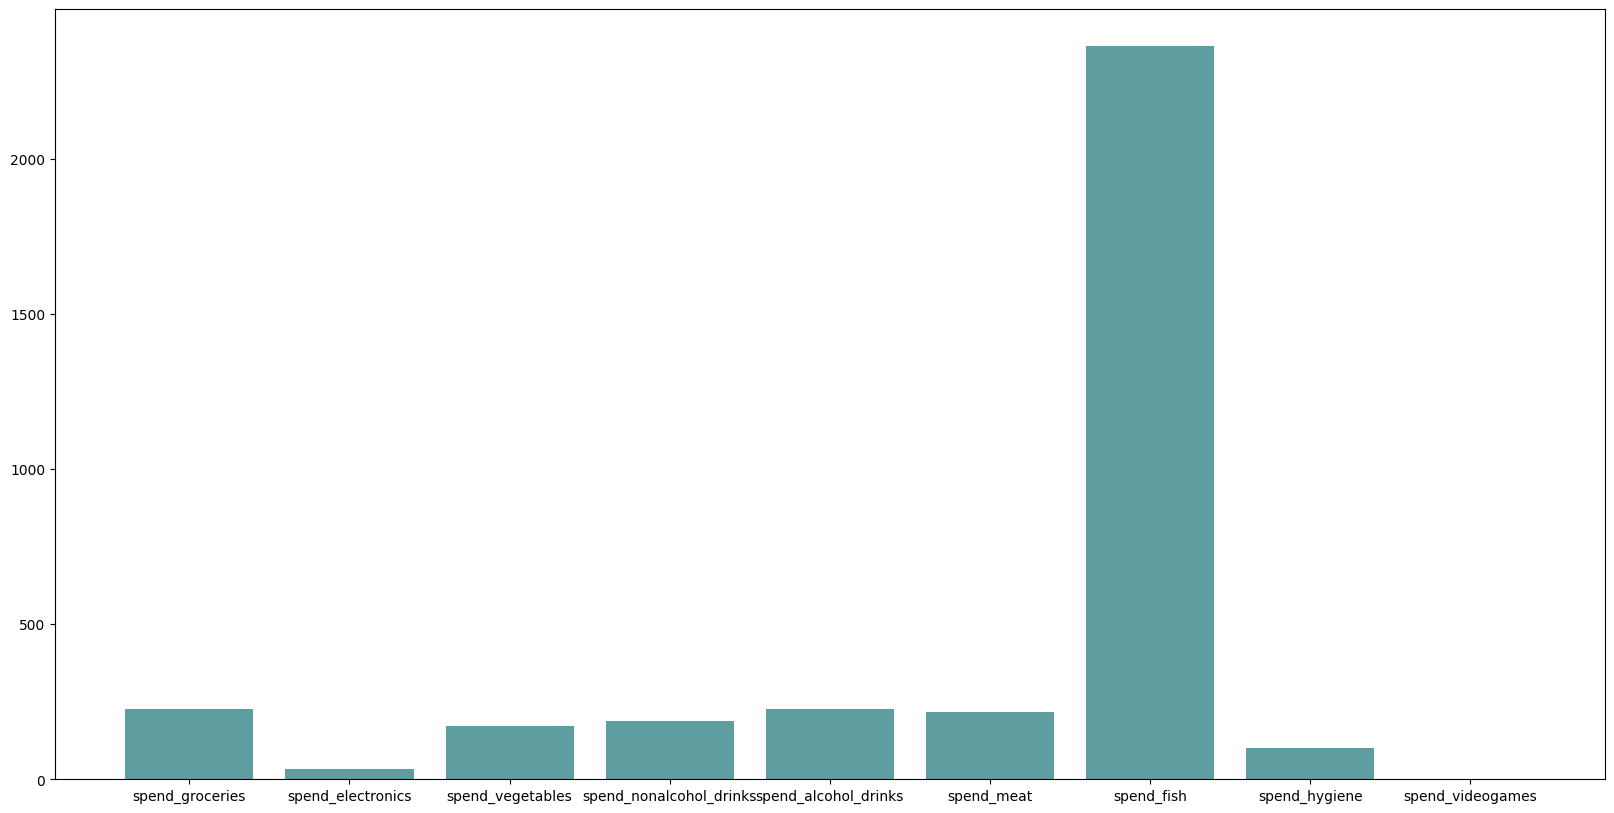

In [44]:
# Calculate the sum of the logarithm of spending values for each column in the 'supermarkets' DataFrame
sum_logs_spends = supermarkets[spends].apply(lambda x: np.log(x)).sum()

plt.bar(sum_logs_spends.index, sum_logs_spends.values, color = 'cadetblue')
plt.show()

**Conclusion**:<br>
As the values are quite strange and different from people's pattern, there is no point in doing an in-depth exploration, because there is a possibility that the data will be unformatted when merged with people's data. In this way, they are considered a priori as a cluster without the need for their particularities to be evaluated. They will only be worked on again in the association rules.

## Duplicates

In [45]:
people.duplicated().sum()

0

There is no duplicates in our dataset

# Inconsistencies

### `customer_antiquity` vs. `customer_age`

In [46]:
# Selecting rows from the 'people' DataFrame where the customer age is less than the sum of customer antiquity and 16
people[people['customer_age'] < people['customer_antiquity'] + 16]

customer_name  customer_gender  customer_age  \
customer_id                                                    
38             Brenda Shelvey            False            27   
45                Glenn Nolen             True            39   
52              Jeffrey Dixon             True            24   
61              Arthur Dunkle             True            29   
62              Robert Manley             True            23   
...                       ...              ...           ...   
29912             Amber Goode            False            27   
29918          Margaret Tyree            False            28   
29923           Sybil Langdon            False            39   
29984        Charlie Harkness             True            27   
29985            Dirk Riddley             True            26   

             customer_education  kids_home  teens_home   latitude  longitude  \
customer_id                                                                    
38                            1          1           0  38.731853  -9.148135   
45                            2          2           0  38.743256  -9.118094   
52                            1          1           0  38.752115  -9.188887   
61                            1          0           0  38.734156  -9.152110   
62                            0          0           0  38.750449  -9.154742   
...                         ...        ...         ...        ...        ...   
29912                         0          1           0  38.783764  -9.123708   
29918                         0          0           0  38.757327  -9.098630   
29923                         0          1           1  38.752675  -9.190285   
29984                         0          1           1  38.759036  -9.187639   
29985                         0          1           0  38.730777  -9.186673   

             customer_antiquity  customer_loyalty  ...  spend_videogames  \
customer_id                                        ...                     
38                           14                 1  ...               606   
45                           25                 1  ...                52   
52                           16                 1  ...               201   
61                           14                 1  ...               710   
62                           10                 1  ...               101   
...                         ...               ...  ...               ...   
29912                        13                 0  ...                57   
29918                        18                 0  ...               576   
29923                        24                 0  ...                47   
29984                        13                 0  ...                62   
29985                        13                 0  ...              1275   

             percentage_spend_groceries  percentage_spend_electronics  \
customer_id                                                             
38                             0.623310                      0.090189   
45                             0.705223                      0.009105   
52                             0.224651                      0.095306   
61                             0.608443                      0.094387   
62                             0.081967                      0.013542   
...                                 ...                           ...   
29912                          0.418347                      0.019519   
29918                          0.656941                      0.068563   
29923                          0.722240                      0.008838   
29984                          0.331823                      0.016988   
29985                          0.443475                      0.015158   

             percentage_spend_vegetables  percentage_spend_nonalcohol_drinks  \
customer_id                                                                    
38                              0.025325   

In [47]:
# Updating 'customer_antiquity' column to NaN for rows in 'people' DataFrame where the customer age is less than the sum of customer antiquity and 16
people.loc[people['customer_age'] < people['customer_antiquity'] + 16, 'customer_antiquity'] = np.nan

In [48]:
knn_imputer_best_k(people.iloc[:, 1:], 2, 10)

Best K value: 4


In [49]:
# Initialize KNNImputer with parameters: 5 nearest neighbors and distance weighting
knn_imputer = KNNImputer(n_neighbors=5, weights='distance').fit(people.iloc[:, 1:])

# Impute missing values in 'people' DataFrame and create a new DataFrame 'people_imputed'
people_imputed = pd.DataFrame(knn_imputer.transform(people.iloc[:, 1:]), columns=people.iloc[:, 1:].columns, index=people.iloc[:, 1:].index)

# Round the 'customer_antiquity' column values to the nearest integer
people_imputed['customer_antiquity'] = people_imputed['customer_antiquity'].round(0)

# Select rows from 'people_imputed' DataFrame where 'customer_age' is less than the sum of 'customer_antiquity' and 16
people_imputed[people_imputed['customer_age'] < people_imputed['customer_antiquity'] + 16]


customer_gender  customer_age  customer_education  kids_home  \
customer_id                                                                 
38                       0.0          27.0                 1.0        1.0   
45                       1.0          39.0                 2.0        2.0   
52                       1.0          24.0                 1.0        1.0   
68                       1.0          26.0                 1.0        3.0   
76                       0.0          25.0                 3.0        1.0   
...                      ...           ...                 ...        ...   
29898                    1.0          27.0                 0.0        0.0   
29912                    0.0          27.0                 0.0        1.0   
29918                    0.0          28.0                 0.0        0.0   
29923                    0.0          39.0                 0.0        1.0   
29985                    1.0          26.0                 0.0        1.0   

             teens_home   latitude  longitude  customer_antiquity  \
customer_id                                                         
38                  0.0  38.731853  -9.148135                12.0   
45                  0.0  38.743256  -9.118094                25.0   
52                  0.0  38.752115  -9.188887                13.0   
68                  2.0  38.752974  -9.146048                12.0   
76                  0.0  38.776886  -9.162822                16.0   
...                 ...        ...        ...                 ...   
29898               0.0  38.740764  -9.195041                14.0   
29912               0.0  38.783764  -9.123708                13.0   
29918               0.0  38.757327  -9.098630                14.0   
29923               1.0  38.752675  -9.190285                24.0   
29985               0.0  38.730777  -9.186673                14.0   

             customer_loyalty  typical_hour  ...  spend_videogames  \
customer_id                                  ...                     
38                        1.0          19.0  ...             606.0   
45                        1.0          13.0  ...              52.0   
52                        1.0          18.0  ...             201.0   
68                        1.0          18.0  ...             798.0   
76                        1.0          14.0  ...             203.0   
...                       ...           ...  ...               ...   
29898                     0.0          18.0  ...             441.0   
29912                     0.0          13.0  ...              57.0   
29918                     0.0          19.0  ...             576.0   
29923                     0.0          18.0  ...              47.0   
29985                     0.0          18.0  ...            1275.0   

             percentage_spend_groceries  percentage_spend_electronics  \
customer_id                                                             
38                             0.623310                      0.090189   
45                             0.705223                      0.009105   
52                             0.224651                      0.095306   
68                             0.472751                      0.020063   
76                             0.223166                      0.474087   
...                                 ...                           ...   
29898                          0.650554                      0.064589   
29912                          0.418347                      0.019519   
29918                          0.656941                      0.068563   
29923                          0.722240                      0.008838   
29985                          0.443475                      0.015158   

             percentage_spend_vegetables  percentage_spend_nonalcohol_drinks  \
customer_id                                                                    
38                              0.025325                            0.032389   
45          

In [50]:
# Drop the 'customer_antiquity' column from the 'people' DataFrame
people.drop('customer_antiquity', axis=1, inplace=True)

# Exports

In [51]:
# Concatenate the 'customer_name' column from 'people' DataFrame and 'supermarkets' DataFrame and sort the result
solution = pd.concat([people.loc[:, 'customer_name'], supermarkets.loc[:, 'customer_name']]).sort_index()

In [52]:
# Save the DataFrames to a CSV file
people.to_csv(path + 'people.csv')
supermarkets.to_csv(path + 'supermarkets.csv')
solution.to_csv(path + 'solution.csv')